In [1]:
!pip install contractions
!pip install vader
!pip install vaderSentiment
!pip install transformers #==4.37.2
!pip install torch
!pip install emoji
!pip install squarify
!pip install tensorflow #==2.11.0
!pip install keras #==2.11.0
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 5.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for sonopy: filename=sonopy-0.1.2-py3-none-any.whl size=2854 sha256=820d686ba3ecf0d281108c31cea8f098677edb15dcc7974a9bef816c24a37680
  Stored in directory: /root/.cache/pip/wheels/28/ce/4c/da72f69726979138abf1ad04a616ae9480543a04aa751f1fee
Successfully built sonopy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 4.7 MB/s eta 0:00:0000:0100:01


In [2]:
#importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re


import emoji
import contractions
from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator
from nltk.tokenize import TweetTokenizer, word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from PIL import Image
from IPython import display

from transformers import BertTokenizer, TFBertForSequenceClassification, BertModel, AutoTokenizer, AutoModel, AutoModelForSequenceClassification
import tensorflow as tf
import torch
from sklearn.preprocessing import OneHotEncoder
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense,Bidirectional
from keras.layers import *
from sklearn.metrics import classification_report
import random
import matplotlib
import squarify
import nltk
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import statistics
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings("ignore")

#setting transformers warning off
from transformers import logging
logging.set_verbosity_warning()

In [3]:
#setting column width to max to view the full tweet text

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### 1. Loading and understanding the dataset

In [4]:
#Loading the dataset

vaccine_tweets = pd.read_csv('vaccination_all_tweets.csv')

In [5]:
# #importing the dataset from google drive

# from google.colab import drive
# drive.mount('/content/drive')

# path = "/content/drive/My Drive/Colab Notebooks/vaccination_all_tweets.csv"
# vaccine_tweets = pd.read_csv(path)

In [6]:
#Viewing the first 5 records

vaccine_tweets.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                                                                                                                    user_description  \
0                                   Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻   
1            Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.   
2                                                                                                                                     heil, hydra 🖐☺   
3  Hosting "CharlesAdlerTonight" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca   
4                Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views   

          user_created  user_followers  user_friends  user_favourites  \
0  2009-04-08 17:52:46             405          1692             3247   
1  2009-09-21 15:27:30             834           666              178   
2  2020-06-25 23:30:28              10            88              155   
3  2008-09-10 11:28:53           49165          3933            21853   
4  2020-04-23 17:58:42             152           580             1473   

   user_verified                 date  \
0          False  2020-12-20 06:06:44   
1          False  2020-12-13 16:27:13   
2          False  2020-12-12 20:33:45   
3           True  2020-12-12 20:23:59   
4          False  2020-12-12 20:17:19   

                                                                                                                                           text  \
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq   

                                                                              hashtags  \
0                                                                   ['PfizerBioNTech']   
1                                                                                  NaN   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']   
3                                                                                  NaN   
4                                       ['whereareallthesickpeople', 'PfizerBioNTech']   

                source  retweets  favorites  is_retweet  
0  Twitter for Android         0          0       False  
1      Twitter Web App         1          1       False  
2  Twitter for Android         0          0       False  
3      Twitter Web App       446       2129       False  
4   Twitter for iPhone         0          0       False

In [7]:
#Checking shape of the dataset

vaccine_tweets.shape

(228207, 16)

In [8]:
#Checking the info of the dataset

vaccine_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [9]:
#Viewing the statistics

vaccine_tweets.describe()

id  user_followers   user_friends  user_favourites  \
count  2.282070e+05    2.282070e+05  228207.000000     2.282070e+05   
mean   1.407541e+18    9.605393e+04     986.736204     1.210417e+04   
std    2.908485e+16    8.389053e+05    5293.500468     3.908233e+04   
min    1.337728e+18    0.000000e+00       0.000000     0.000000e+00   
25%    1.381940e+18    5.500000e+01      27.000000     5.700000e+01   
50%    1.408133e+18    3.280000e+02     229.000000     9.960000e+02   
75%    1.428688e+18    1.521000e+03     794.000000     7.300000e+03   
max    1.463251e+18    1.635305e+07  582461.000000     1.299600e+06   

            retweets      favorites  
count  228207.000000  228207.000000  
mean        2.489284      10.819020  
std        51.079821     199.527693  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       2.000000  
max     12294.000000   54017.000000

In [10]:
#Checking the null values

vaccine_tweets.isnull().mean()*100

id                   0.000000
user_name            0.000876
user_location       29.320310
user_description     7.457265
user_created         0.000000
user_followers       0.000000
user_friends         0.000000
user_favourites      0.000000
user_verified        0.000000
date                 0.000000
text                 0.000000
hashtags            21.779788
source               0.052146
retweets             0.000000
favorites            0.000000
is_retweet           0.000000
dtype: float64

In [11]:
#chcking the unique user name

vaccine_tweets.user_name.nunique()

85549

In [12]:
#Checking the count of verified user in unique users
vaccine_tweets.groupby(['user_name','user_verified']).size().reset_index(name='counts').user_verified.value_counts()

False    82678
True      3017
Name: user_verified, dtype: int64

In [13]:
#checking the number of unique tweets

vaccine_tweets.text.nunique()

226373

In [14]:
#Is dataset contains retweets?

vaccine_tweets.is_retweet.value_counts()

False    228207
Name: is_retweet, dtype: int64

##### Observations:

- There are 228207 records and 16 fields in the dataset
- user_location and hashtags are two columns missing more values
- Our target tweets column 'text' have no null value
- Number of unique users are 85549 and only 19202 users are verified.
- Number of unique tweets (text) are 226373
- Retweets are not included in the dataset

### 2. EDA

In [15]:
#top 5 retweets by user

top10_retweets = vaccine_tweets.sort_values(by=['retweets'], ascending=False)[['text','user_name','retweets']].head(5)

top10_retweets.style.hide()

In [16]:
#Number of tweets from per month from dataset

vaccine_tweets['date'] = pd.to_datetime(vaccine_tweets['date'])

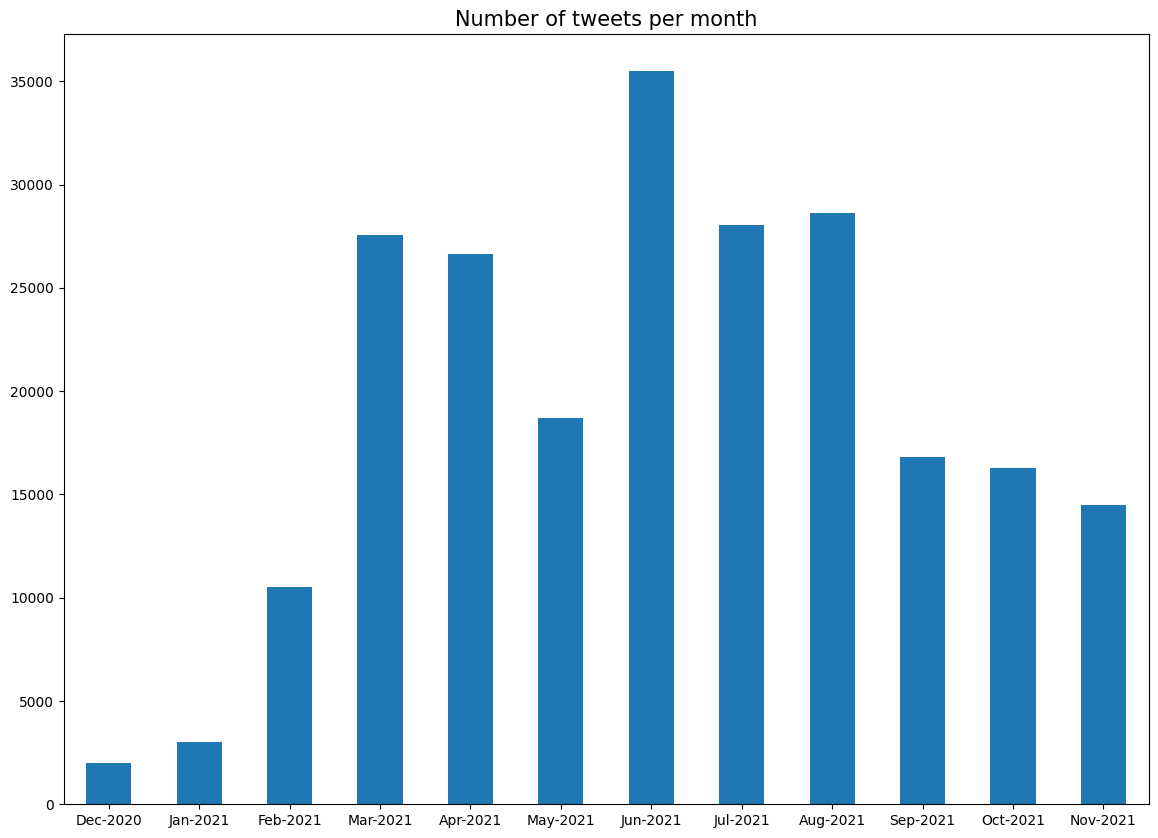

In [17]:
plt.figure(figsize=(14,10))
vaccine_tweets.date.dt.strftime('%b-%Y').value_counts(sort=False).plot(kind='bar', rot=0)
plt.title('Number of tweets per month', fontdict={'fontsize': 15})

plt.savefig("3.2 Number of tweets per month.svg", format='svg', dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)

plt.show()

##### Observations:

- It is noticed that tweets about vaccine slowly started and was peak in Jun-2021.

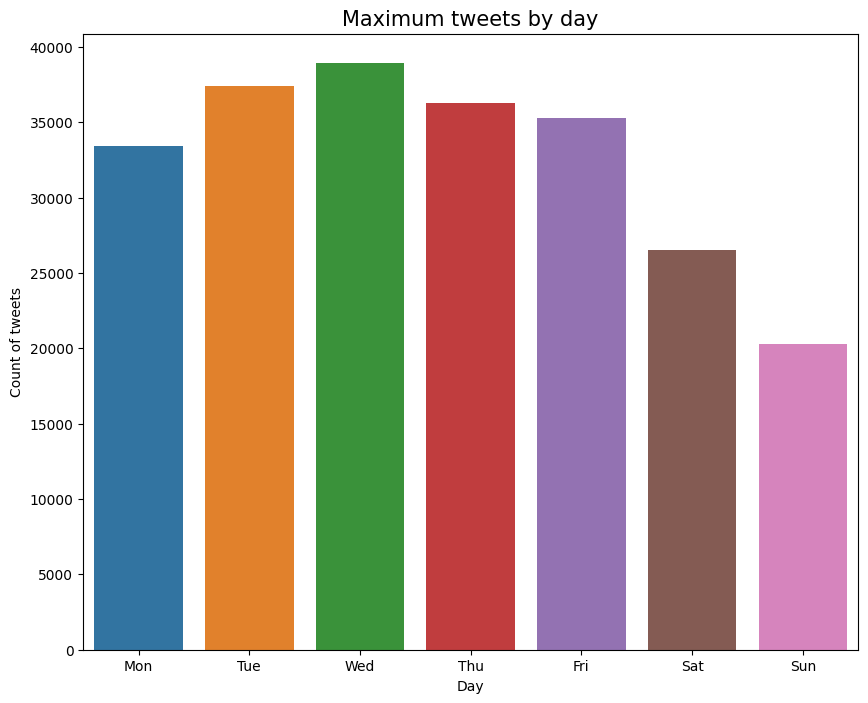

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
d = {n:day for n, day in enumerate(dmap)}

day_of_tweets = vaccine_tweets["date"].apply(lambda d : d.dayofweek).map(dmap)

day_of_tweets_sorted = pd.Categorical(day_of_tweets, categories=dmap.values(), ordered=True)

plt.figure(figsize=(10,8))
plt.title("Maximum tweets by day", fontdict={'fontsize': 15})
sns.barplot(x=day_of_tweets_sorted.value_counts().index, y=day_of_tweets_sorted.value_counts())
plt.xlabel('Day')
plt.ylabel('Count of tweets')

plt.savefig("4.2 Day of tweets.svg", format='svg', dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)

plt.show()

##### Observations:

- Maximum tweets posted on Wednesday

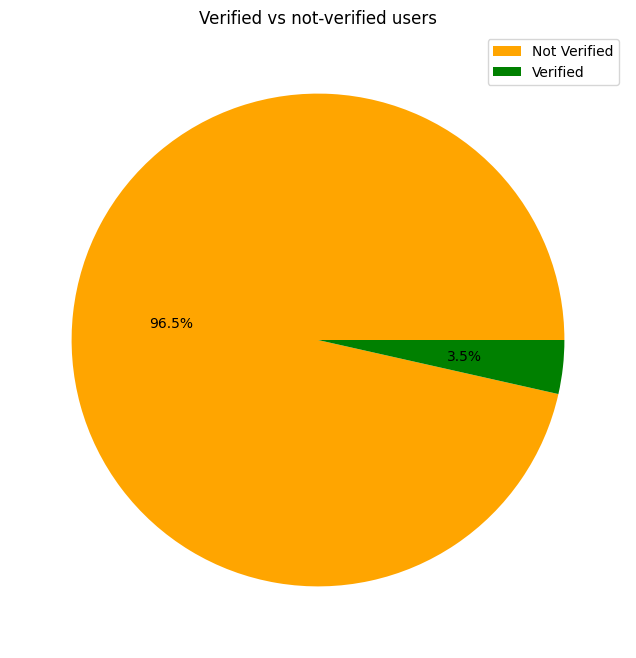

In [19]:
#plotting verified user tweets vs not verified users

users_verified = vaccine_tweets.groupby(['user_name','user_verified']).size().reset_index(name='counts').user_verified.value_counts()

plt.figure(figsize=(10,8))
ax = users_verified.plot(kind='pie', autopct='%1.1f%%', colors=['Orange','Green'], title='Verified vs not-verified users',
                         ylabel='', labeldistance=None)
#ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.legend(labels=['Not Verified','Verified'], loc='best')

plt.savefig("4.1 Verified vs Not-Verified users.svg", format='svg', dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)

plt.show()

##### Observations:

- Only 8.4% users who posted the tweets are verified

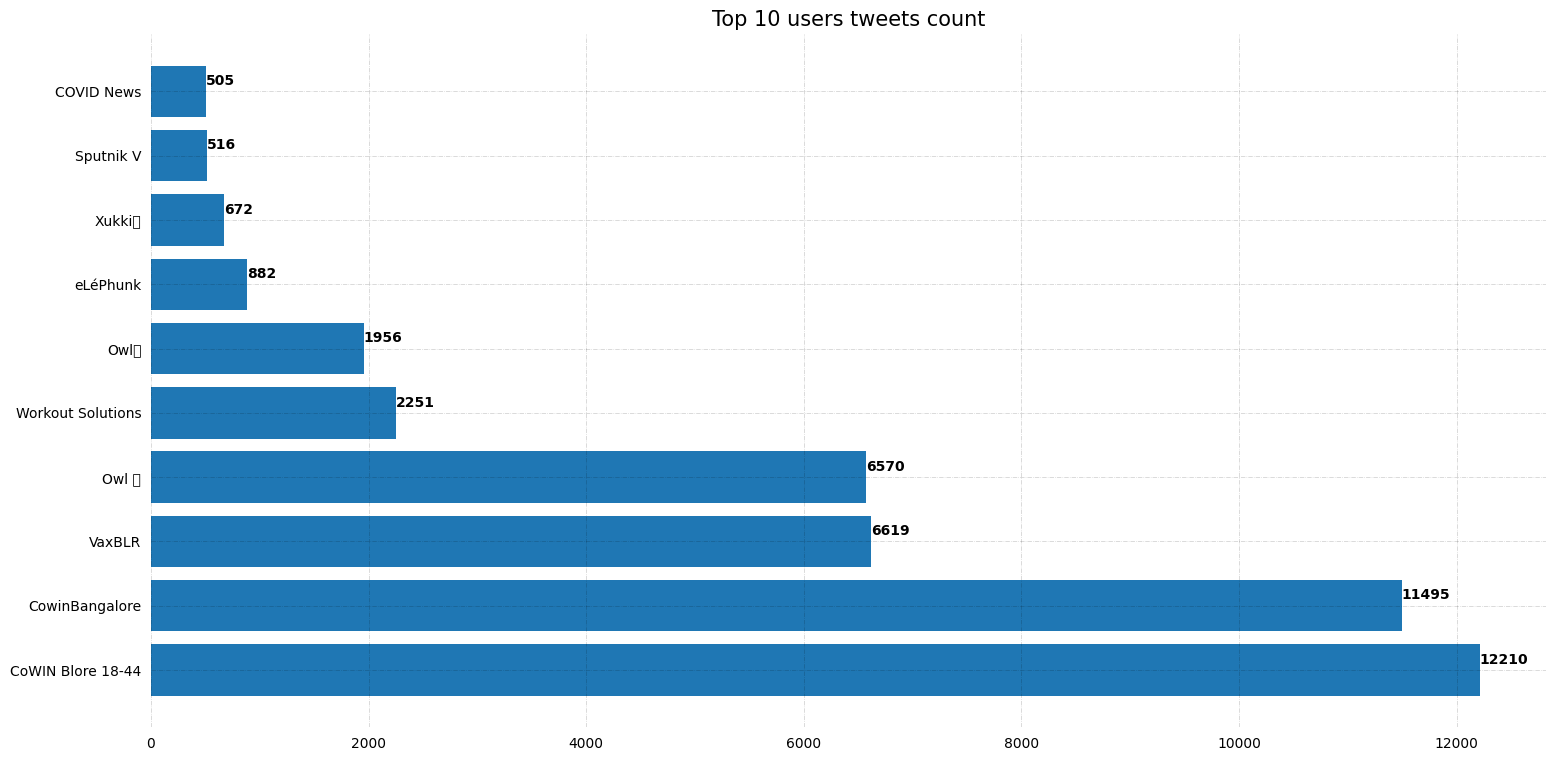

In [20]:
#top users who posted the tweets

top10_users = vaccine_tweets.user_name.value_counts()[:10].rename_axis('User Name').reset_index(name='Tweets Count')

fig, ax = plt.subplots(figsize=(18, 9))

ax.barh(top10_users['User Name'], top10_users['Tweets Count'])

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')


# Add x, y gridlines
ax.grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
    
# Add Plot Title
ax.set_title('Top 10 users tweets count', fontdict={'fontsize': 15})

plt.savefig("4.3 Top ten users by tweets.svg", format='svg', dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

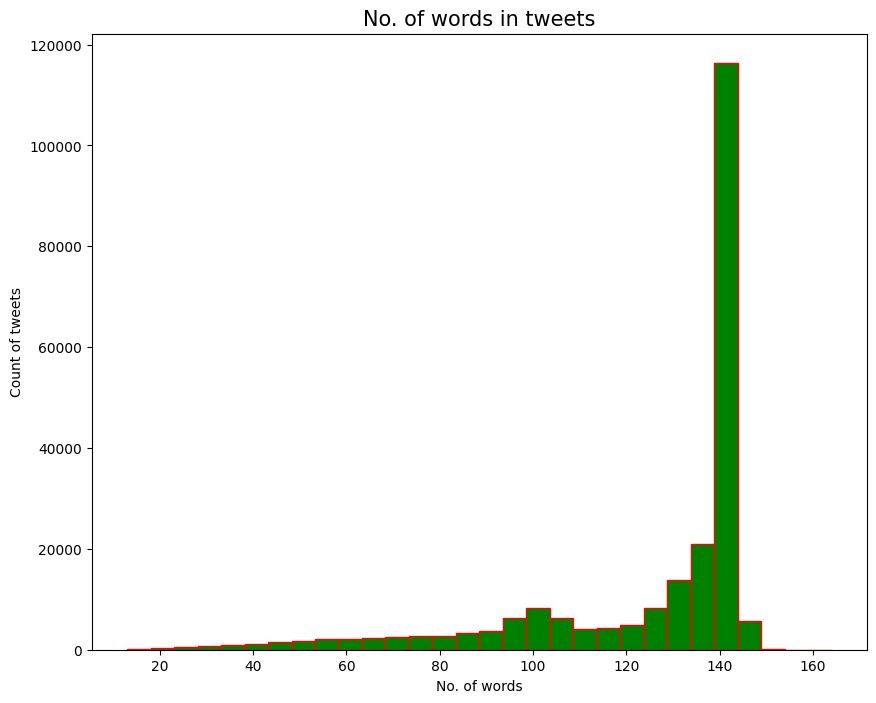

In [21]:
#Lengeth of tweet text

text_len = [len(i) for i in vaccine_tweets.text]

plt.figure(figsize=(10,8))
plt.hist(text_len, bins=30, color='green', edgecolor='red')
plt.xlabel("No. of words")
plt.ylabel("Count of tweets")
plt.title('No. of words in tweets', fontdict={'fontsize': 15})
plt.savefig("4.4 Number of words in Tweets.svg", format='svg', dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

##### Observation:

- Most of the tweets are about 140 to 145 words

In [22]:
#Top 10 hastags used in the tweets

top10_hashtags = vaccine_tweets.hashtags.str.lower().value_counts()[:10]

plt.figure(figsize=(12,10))
ax = sns.barplot(x=top10_hashtags, y=top10_hashtags.index)

for i in ax.containers:
    ax.bar_label(i,)
    
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_visible(False)
ax.set_title('Top 10 hashtags mentions', fontdict={'fontsize': 15})
plt.savefig("4.5 Top 10 hashtags mentions.svg", format='svg', dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

##### Observations:

- Most of the hashtags are about Covaxin

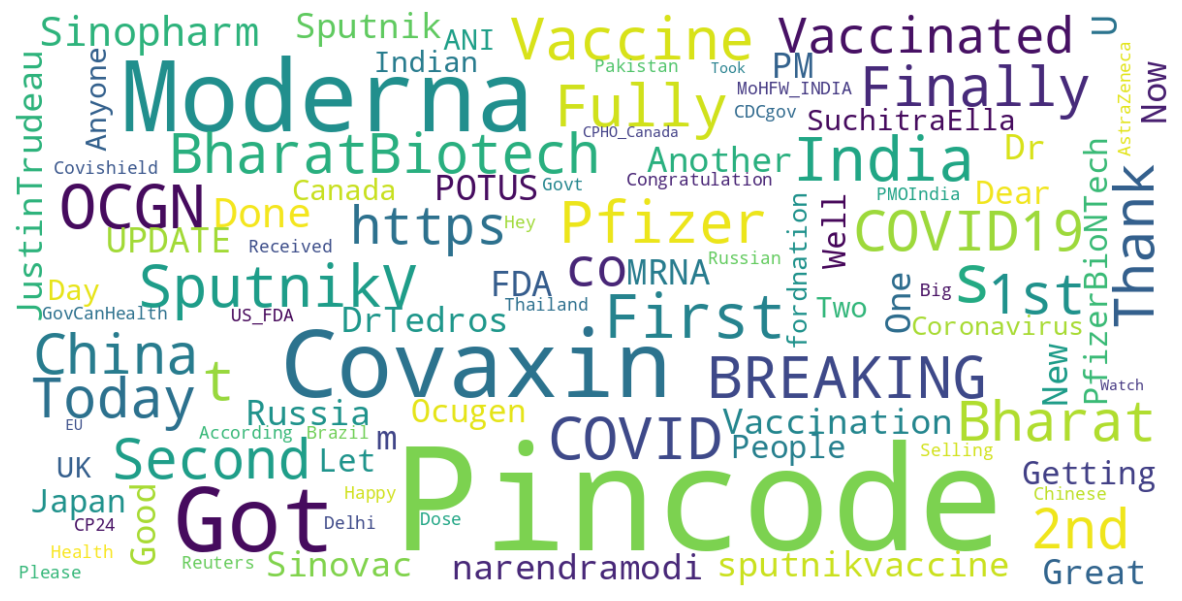

In [23]:
# Check the most word occurrence in tweets using word cloud

wc_text_bf = " ".join(t.split()[0] for t in vaccine_tweets['text'])

stpwords = set(STOPWORDS)
wordcloud_bf = WordCloud(background_color='white', stopwords=stpwords, max_words=100, max_font_size=50,
                     scale=3, random_state=1, collocations=False).generate(wc_text_bf)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_bf, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3. Data preprocessing

Sentiment analysis will be based on tweets so we take only the text column for our analysis

In [24]:
#dropping records that contains duplicate tweet text

vaccine_tweets.drop_duplicates(subset="text", keep="first", inplace=True)

In [25]:
#creating new dataframe with the tweet text

tweets_text = vaccine_tweets[['text']]

In [26]:
tweets_text.head()

text
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq

In [27]:
tweets_text.shape

(226373, 1)

#### 3.1 Text Preprocessing

Following text preprocessing will be performed:

- Text cleaning
    - lower case conversion
    - removing new line string i.e. \n
    - removing the user tags and hashtags, URLs
    - convert emojis to words
    - remove other than text and single characters
    - remove double space, digits, leading and ending space

In [28]:
#function to clean the text

def text_cleaning(text):

    text = text.lower()                                                                 #convert to lowercase
    text = re.sub('\n', ' ', text)                                                      #remove new line string
    text = contractions.fix(text)                                                       #extend contractions
    text = re.sub(r"@[^\s]+", " ", str(text))                                           #removing the user tags(@)
    text = re.sub(r"#[^\s]+", " ", str(text))                                           #removing the hashtags(#)
    text = re.sub(r"http[^\s]+", " ", str(text))                                        #remove URLs
    text = emoji.demojize(text)                                                         #convert emojis
    text = re.sub(r'[^A-Za-z0-9]+',' ', text)                                           #remove other than text
    text = re.sub(r'\d+'," ", text)                                                     #remove digits
    text = re.sub(' +',' ', text)                                                       #remove double space
    text = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)                        #remove single characters
    text = text.strip()                                                                 #remove leading and ending spaces

    return text

In [29]:
#applying the function

tweets_text["text_cleaned"] = tweets_text["text"].apply(lambda text: text_cleaning(text))

In [30]:
tweets_text[30:35]

text  \
30         @ZubyMusic 6 deaths so far. \nIt's only death, nothing to worry about then 🤔\n#CovidVaccines\n#Pfizervaccine… https://t.co/HkGTDM5J3f   
31             @sbnumb3 @nytimes Please don’t spread fake news! There is no evidence that these cases are linked to the… https://t.co/bMcAhIPR5g   
32                  #ICYMI The #FDA Authorized the #PfizerBioNTech #COVID19 #Vaccine for the United States last night\n\nhttps://t.co/CtYGB3fNnE   
33  All respect to due process but why not give approval now instead of the 29th of December. Surely multiple other cou… https://t.co/Xv0SRv1Ukw   
34                                                              Vaccine!! Anyone?? #covid #Pfizervaccine #PfizerBioNTech https://t.co/b9ZKwnlIkX   

                                                                                                        text_cleaned  
30                                          deaths so far it is only death nothing to worry about then thinking face  
31                            please do not spread fake news there is no evidence that these cases are linked to the  
32                                                               the authorized the for the united states last night  
33  all respect to due process but why not give approval now instead of the th of december surely multiple other cou  
34                                                                                                    vaccine anyone

In [31]:
#Tokenization using TweetTokenizer

tknzr = TweetTokenizer()

tweets_text["text_cleaned"] = tweets_text["text_cleaned"].apply(lambda text: tknzr.tokenize(text))

In [32]:
#removal of stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

tweets_text["text_cleaned"] = tweets_text["text_cleaned"].apply(lambda text: [t for t in text if t not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
# #Stemming

# from nltk.stem import SnowballStemmer

# snowball_stem = SnowballStemmer(language='english')

# def snow_stem(text):
#     stm = [snowball_stem.stem(word) for word in text]
#     return stm

# tweets_text["text_cleaned"] = tweets_text["text_cleaned"].apply(lambda text: snow_stem(text))

In [34]:
#lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

wordnet_lemma = WordNetLemmatizer()

def lemma(text):
    lem = [wordnet_lemma.lemmatize(word) for word in text]
    return lem

tweets_text["text_cleaned"] = tweets_text["text_cleaned"].apply(lambda text: lemma(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [35]:
#joining the words together

tweets_text['text_cleaned'] = tweets_text['text_cleaned'].apply(lambda text: " ".join(text))

In [36]:
tweets_text.head()

text  \
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq   

                                                            text_cleaned  
0                      folk said daikon paste could treat cytokine storm  
1  world wrong side history year hopefully biggest vaccination effort ev  
2                                      russian vaccine created last year  
3   fact immutable senator even ethically sturdy enough acknowledge born  
4                                                   explain need vaccine

In [37]:
#getting the common words

common_words = ([word for sent in tweets_text.text_cleaned for word in sent.split() if word not in stop_words])

freq_dist = FreqDist(common_words)

top10_common_words = freq_dist.most_common(10)

top10_common_words

[('vaccine', 53925),
 ('dose', 51490),
 ('slot', 34626),
 ('age', 33074),
 ('covaxin', 20036),
 ('covid', 17484),
 ('got', 12976),
 ('first', 12933),
 ('hospital', 12801),
 ('pincode', 12358)]

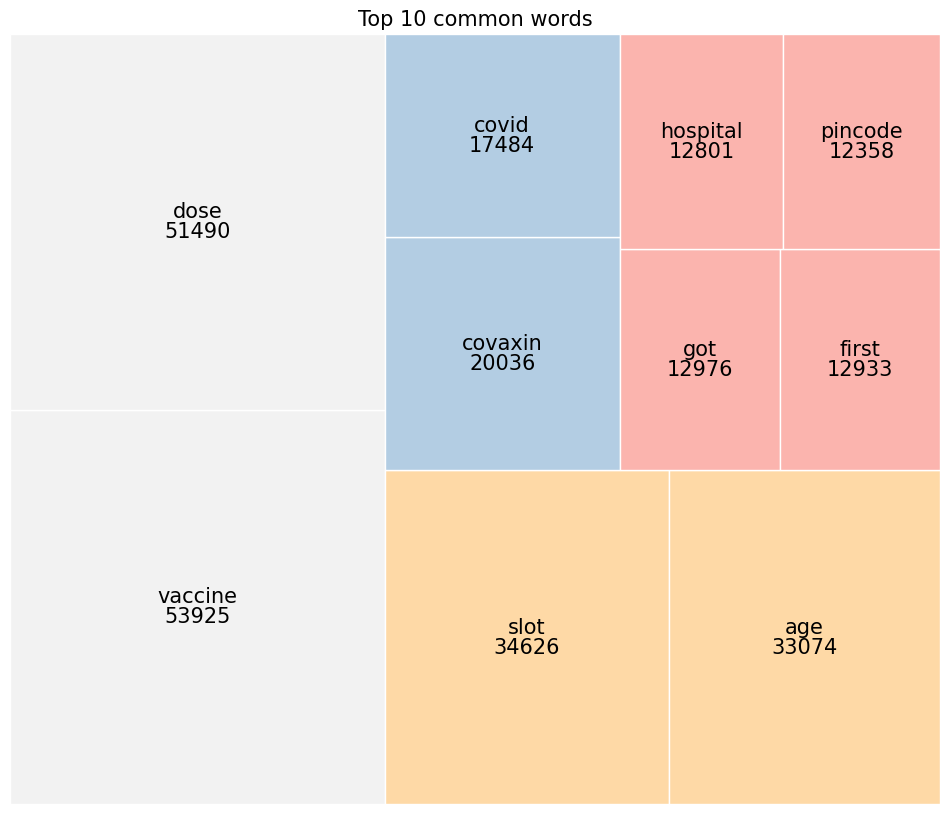

In [38]:
#Treemap of top 10 common words

a, b = zip(*top10_common_words)

plt.figure(figsize=(12,10))
norm = matplotlib.colors.Normalize(vmin=min(b), vmax=max(b))
colors = [matplotlib.cm.Pastel1(norm(value)) for value in b]
squarify.plot(b, label=a, value=b, color=colors, bar_kwargs=dict(linewidth=1, edgecolor="white"), text_kwargs={'fontsize':15})

plt.axis('off')
plt.title("Top 10 common words", fontdict={'fontsize': 15})

plt.savefig("4.6 Top 10 common words.svg", format='svg', dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

In [39]:
#removing the top10 frequent words from the cleaned tweet text

top10_common_words = [word for word, word_count in top10_common_words]

pattern = r'\b(?:{})\b'.format('|'.join(top10_common_words))

tweets_text["text_cleaned"] = tweets_text["text_cleaned"].replace(pattern,'', regex=True)

In [40]:
tweets_text.head()

text  \
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq   

                                                            text_cleaned  
0                      folk said daikon paste could treat cytokine storm  
1  world wrong side history year hopefully biggest vaccination effort ev  
2                                             russian  created last year  
3   fact immutable senator even ethically sturdy enough acknowledge born  
4                                                          explain need

#### 3.2 WordCloud after data preprocessing

In [41]:
wc_text_af = " ".join(t for t in tweets_text['text_cleaned'])

wordcloud_bf = WordCloud(background_color='white', stopwords=stpwords, max_words=100, max_font_size=50,
                     scale=3, random_state=1, collocations=False).generate(wc_text_af)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_bf, interpolation='bilinear')
plt.axis('off')
plt.show()

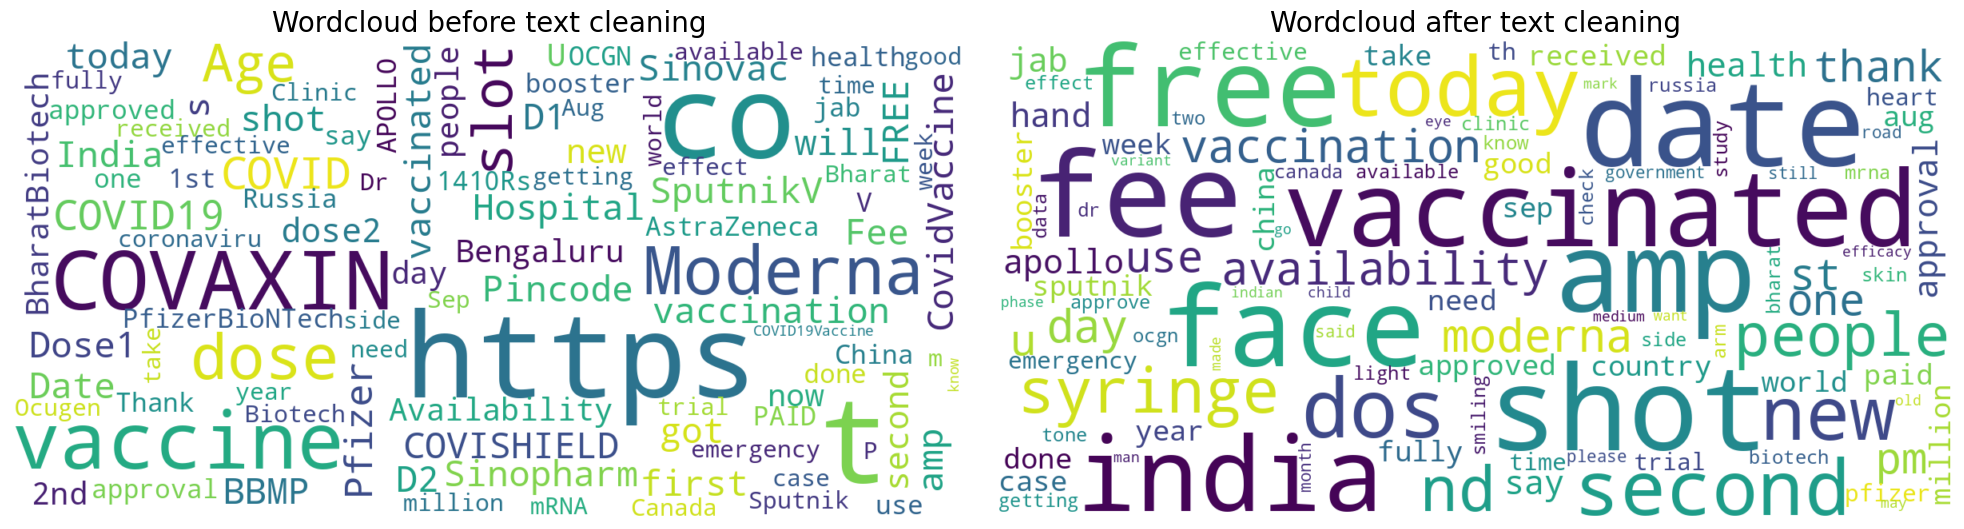

In [42]:
#Plotting wordcloud before and after preprocessing

wc_text_bf = " ".join(t for t in tweets_text['text'])
wc_text_af = " ".join(t for t in tweets_text['text_cleaned'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.set_figheight(10)
fig.set_figwidth(20)

wordcloud_stopwords = set(STOPWORDS)

wordcloud_before = WordCloud(background_color='white', stopwords=wordcloud_stopwords, max_words=100, max_font_size=50,
                     scale=3, random_state=1, collocations=False).generate(wc_text_bf)

wordcloud_after = WordCloud(background_color='white', stopwords=wordcloud_stopwords, max_words=100, max_font_size=50,
                     scale=3, random_state=1, collocations=False).generate(wc_text_af)
#plt.figure(figsize=(15,15))
ax1.imshow(wordcloud_before, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Wordcloud before text cleaning', fontdict={'fontsize': 20})

ax2.imshow(wordcloud_after, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Wordcloud after text cleaning', fontdict={'fontsize': 20})


plt.tight_layout(pad=2)
fig.savefig("4.9 Wordcloud after data cleaning.svg", format='svg', dpi=600, bbox_inches='tight')

plt.show()

### 4. Sentiment classification using VADER

#### 4.1 VADER

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [44]:
sid = SentimentIntensityAnalyzer()

In [45]:
#Getting the polarity scores of the each tweet

tweets_text['scores'] = tweets_text['text_cleaned'].apply(lambda text: sid.polarity_scores(text))

In [46]:
#Extracting the compound score of the each tweet

tweets_text['compound'] = tweets_text['scores'].apply(lambda score_dict: score_dict['compound'])

In [47]:
tweets_text.head()

text  \
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq   

                                                            text_cleaned  \
0                      folk said daikon paste could treat cytokine storm   
1  world wrong side history year hopefully biggest vaccination effort ev   
2                                             russian  created last year   
3   fact immutable senator even ethically sturdy enough acknowledge born   
4                                                          explain need    

                                                           scores  compound  
0    {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}    0.4019  
1  {'neg': 0.225, 'neu': 0.58, 'pos': 0.196, 'compound': -0.1027}   -0.1027  
2          {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.25}    0.2500  
3           {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}    0.0000  
4           {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}    0.0000

In [48]:
#Function to assign the sentiment based on the compound score

def sentiment(comp_score):
    if comp_score >= 0.05:
        return "Positive"
    elif comp_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

tweets_text["sentiment"] = tweets_text["compound"].apply(sentiment)

tweets_text.sentiment.value_counts(normalize=True)*100

Neutral     45.630000
Positive    39.648721
Negative    14.721279
Name: sentiment, dtype: float64

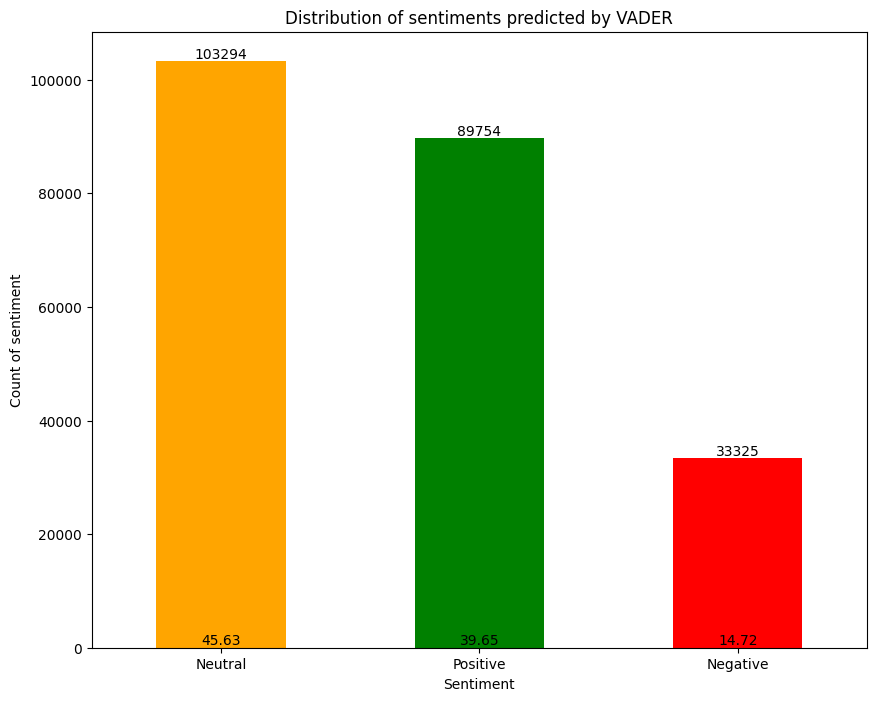

In [49]:
#plotting the sentiment predicted by VADER

p1 = tweets_text.sentiment.value_counts().plot(kind='bar', color=["Orange","Green","Red"], figsize=(10,8), rot=0,
                                                            title = "Distribution of sentiments predicted by VADER")

p2 = round((tweets_text.sentiment.value_counts(normalize=True)*100),2).plot(kind='bar', color=["Orange","Green","Red"],
                                                                   figsize=(10,8), rot=0,
                                                                   title = "Distribution of sentiments predicted by VADER")

for p in p2.containers:
    p1.bar_label(p, label_type='edge')

plt.xlabel("Sentiment")
plt.ylabel("Count of sentiment")

plt.savefig("4.8 Sentiments by VADER.svg", format='svg', dpi=600, bbox_inches='tight')

plt.show()

In [50]:
#first 3 negative sentiment`
pos = tweets_text[tweets_text.sentiment == 'Negative'].head(3)

#first 3 positive sentiment
neg = tweets_text[tweets_text.sentiment == 'Positive'].head(3)

#first 3 neutral sentiment
neu = tweets_text[tweets_text.sentiment == 'Neutral'].head(3)

In [51]:
#Concatenating first 3 predicted sentiments as DF

pd.concat([pos, neg, neu])

text  \
1     While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm   
10  while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP   
17          Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F   
0                                                Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
2     #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
5                 Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN   
3     Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
4          Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq   
8                                                               Covid vaccine; You getting it?\n\n #CovidVaccine #covid19 #PfizerBioNTech #Moderna   

                                                             text_cleaned  \
1   world wrong side history year hopefully biggest vaccination effort ev   
10                                death closing mark million people wait    
17                       coronavirus iran report new case death last hour   
0                       folk said daikon paste could treat cytokine storm   
2                                              russian  created last year   
5       anyone useful advice guidance whether   safe whilst breastfeeding   
3    fact immutable senator even ethically sturdy enough acknowledge born   
4                                                           explain need    
8                                                                 getting   

                                                            scores  compound  \
1   {'neg': 0.225, 'neu': 0.58, 'pos': 0.196, 'compound': -0.1027}   -0.1027   
10   {'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'compound': -0.5994}   -0.5994   
17   {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.5994}   -0.5994   
0     {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}    0.4019   
2           {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.25}    0.2500   
5     {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.7003}    0.7003   
3            {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}    0.0000   
4            {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}    0.0000   
8            {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}    0.0000   

   sentiment  
1   Negative  
10  Negative  
17  Negative  
0   Positive  
2   Positive  
5   Positive  
3    Neutral  
4    Neutral  
8    Neutral

#### 4.2 WordCloud for the predicted sentiment

In [52]:
#Wordcloud

wc_text_pos = " ".join(t for t in tweets_text[tweets_text.sentiment == 'Positive'].text_cleaned)
wc_text_neu = " ".join(t for t in tweets_text[tweets_text.sentiment == 'Neutral'].text_cleaned)
wc_text_neg = " ".join(t for t in tweets_text[tweets_text.sentiment == 'Negative'].text_cleaned)

# Circle mask
x, y = np.ogrid[:300, :300]
senti_mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
senti_mask = 255 * senti_mask.astype(int)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))


#wordcloud positive sentiment
wordcloud = WordCloud(background_color='white',
                      contour_color='green',
                      contour_width=2,
                      mask=senti_mask,
                      stopwords=wordcloud_stopwords,
                      max_words=100,
                      max_font_size=40,
                      scale=3, random_state=1, collocations=False
                     ).generate(wc_text_pos)
#plt.figure(figsize=(12,12))
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_title("Positive", fontdict={'fontsize': 30, 'color': 'Green'})
ax1.axis('off')
#plt.show()

#wordcloud neutral sentiment

wordcloud = WordCloud(background_color='white',
                      contour_color='orange',
                      contour_width=2,
                      mask=senti_mask,
                      stopwords=wordcloud_stopwords,
                      max_words=100,
                      max_font_size=40,
                      scale=3, random_state=1, collocations=False
                     ).generate(wc_text_neu)
#plt.figure(figsize=(12,12))
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.set_title("Neutral", fontdict={'fontsize': 30, 'color': 'Orange'})
ax2.axis('off')
#plt.show()

#wordcloud negative sentiment

wordcloud = WordCloud(background_color='white',
                      contour_color='red',
                      contour_width=2,
                      mask=senti_mask,
                      stopwords=wordcloud_stopwords,
                      max_words=100,
                      max_font_size=40,
                      scale=3, random_state=1, collocations=False
                     ).generate(wc_text_neg)
#plt.figure(figsize=(12,12))
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.set_title("Negative", fontdict={'fontsize': 30, 'color': 'Red'})
#plt.title("Wordcloud for the Negative sentiments")
ax3.axis('off')

#fig.title("Wordcloud of sentiments predicted using VADER")
fig.suptitle('Wordcloud of sentiments predicted using VADER', fontsize=30) # or plt.suptitle('Main title')

fig.savefig("4.10 Wordcloud for sentiments by VADER.svg", format='svg', dpi=600, bbox_inches='tight')

plt.show()


#### 4.3 Train-Test split & resampling using Bootstrapping

In [53]:
#Assign label number based on the sentiments

def label_sentiment(senti):
    if senti == 'Positive':
        return 0
    elif senti == 'Negative':
        return 1
    else:
        return 2

tweets_text["sentiment_label"] = tweets_text["sentiment"].apply(label_sentiment)

In [54]:
tweets_text.head()

text  \
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq   

                                                            text_cleaned  \
0                      folk said daikon paste could treat cytokine storm   
1  world wrong side history year hopefully biggest vaccination effort ev   
2                                             russian  created last year   
3   fact immutable senator even ethically sturdy enough acknowledge born   
4                                                          explain need    

                                                           scores  compound  \
0    {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}    0.4019   
1  {'neg': 0.225, 'neu': 0.58, 'pos': 0.196, 'compound': -0.1027}   -0.1027   
2          {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.25}    0.2500   
3           {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}    0.0000   
4           {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}    0.0000   

  sentiment  sentiment_label  
0  Positive                0  
1  Negative                1  
2  Positive                0  
3   Neutral                2  
4   Neutral                2

In [55]:
def bootstrap_train_val_test_split(s_size):
    
    #resampling using bootstrapping 
    tweets_text_pos = tweets_text[tweets_text['sentiment']=='Positive'].sample(sample_size, replace=True)
    tweets_text_neg = tweets_text[tweets_text['sentiment']=='Negative'].sample(sample_size, replace=True)
    tweets_text_neu = tweets_text[tweets_text['sentiment']=='Neutral'].sample(sample_size, replace=True)

    tweets_text_bs = pd.concat([tweets_text_pos, tweets_text_neg, tweets_text_neu])

    print('Shape of dataset is: ', tweets_text['text_cleaned'].shape)
    print('Shape of boostrapped resampled dataset is: ', tweets_text_bs['text_cleaned'].shape)
    
    X = tweets_text_bs['text_cleaned']
    y = tweets_text_bs['sentiment_label']
    
    #splitting the dataset into train and test

    #Splitting into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    #Splitting train into train and validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)
    
    print('\nShape of train is:', X_train.shape)
    print('Shape of val is:', X_val.shape)
    print('Shape of test is:', X_test.shape)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

### 5. Model Building

#### 5.1 BERT

In [56]:
max_len= tweets_text.text_cleaned.str.split().str.len().max() #assigned the max words in the tweets

In [57]:
#defining hyperparameters
bert_num_labels = 3
bert_learning_rate = 2e-5   #recommended is 2e-5, 3e-5 or 5e-5
bert_epochs = 5
bert_batch_size = 32
    
bert_optimizer = tf.keras.optimizers.Adam(learning_rate = bert_learning_rate)
bert_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
bert_metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [58]:
#BERTTokenizer to tokenize and encode the data
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
bert_class_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = bert_num_labels)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
# Model is combiled using relevant optimizer, loss function, and metrics    
bert_class_model.compile(optimizer=bert_optimizer, loss=bert_loss, metrics= [bert_metric])

In [60]:
#Function for the BERT tokenizer and model

def BERT_model(Xtrain, Xval, Xtest, ytrain, yval, ytest):
    
    print("==============================================================")
    print("BERT Model")
    print("==============================================================\n")
    # Tweets are tokenized and encoded
    X_train_encoded = bert_tokenizer(Xtrain.tolist(),
                                              padding = True,
                                              truncation = True,
                                              max_length = max_len,
                                              return_tensors = 'tf')
    
    X_val_encoded = bert_tokenizer(Xval.tolist(),
                                              padding = True,
                                              truncation = True,
                                              max_length = max_len,
                                              return_tensors = 'tf')
    
    X_test_encoded = bert_tokenizer(Xtest.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')
    
    #checking the encoded train dataset
    i=1

    print(f'''Tweets text in train: ==> {Xtrain.iloc[i]}
    \nInput Ids of the text: ==> {X_train_encoded['input_ids'][i]}
    \nDecode Ids of the text: ==> {bert_tokenizer.decode(X_train_encoded['input_ids'][i])}
    \nAttendtion mask of the text: ==> {X_train_encoded['attention_mask'][i]}
    \nSentiment: ==> {tweets_text.sentiment.iloc[i]}
    ''')
    
    
    # Train the model
    history = bert_class_model.fit(
        [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']], ytrain,
        validation_data = ([X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']], 
                           yval),
        batch_size=bert_batch_size,
        epochs=bert_epochs)
    
    #Plotting the train and validation accuracy, loss curve

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
    fig.set_figheight(10)
    fig.set_figwidth(20)

    #Train and Val Accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('BERT Model accuracy', fontdict={'fontsize': 20})
    ax1.legend(['train','val'], loc='upper left')
    ax1.set(xlabel="Epochs", ylabel="Accuracy")


    #Train and Val Loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('BERT Model loss', fontdict={'fontsize': 20})
    ax2.legend(['train','val'], loc='upper left')
    ax2.set(xlabel="Epochs", ylabel="Loss")
    plt.show()
    
    print('\nModel evaluation on test data:')
    #Model evaluation on the test data
    bert_test_loss, bert_test_accuracy = bert_class_model.evaluate(
        [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']],
        ytest)
    
    print(f'\nTest loss: {bert_test_loss}, Test accuracy: {bert_test_accuracy}')
    
    
    #Predict the sentiment of test data set

    bert_pred = bert_class_model.predict(
        [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

    # pred is of type TFSequenceClassifierOutput
    bert_logits = bert_pred.logits

    # Use argmax along the appropriate axis to get the predicted labels
    bert_pred_labels = tf.argmax(bert_logits, axis=1)

    # Convert the predicted labels to a NumPy array
    bert_pred_labels = bert_pred_labels.numpy()

    return bert_test_loss, bert_test_accuracy, bert_pred_labels

#### 5.2 BiLSTM with BERT word embeddings

In [61]:
# Load BERT tokenizer and model
bert_bilstm_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bilstm_model = AutoModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [62]:
#Hyperparameters

#opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
bilstm_epochs = 5
bilstm_batch_size = 16
bilstm_early_stop = EarlyStopping(monitor="val_loss", verbose=2, mode='min', patience=3)

In [63]:
def BiLSTM_model(Xtrain, Xval, Xtest, ytrain, yval, ytest):
    
    # 1. Tokenize and encode text
    # The function returns a dictionary containing the token IDs and attention masks
    #Train data
    print("\n==============================================================")
    print("BiLSTM Model")
    print("==============================================================\n")
    
    print('1. Tokenize and encoding using BERT Tokenizer...')
    train_encoding = bert_bilstm_tokenizer(Xtrain.tolist(),                    # List of input texts
        padding=True,              # Pad to the maximum sequence length
        truncation=True,           # Truncate to the maximum sequence length if necessary
        return_tensors='pt',      # Return PyTorch tensors
        add_special_tokens=True    # Add special tokens CLS and SEP
    )
    
    #Val data
    val_encoding = bert_bilstm_tokenizer(Xval.tolist(),                    # List of input texts
        padding=True,              # Pad to the maximum sequence length
        truncation=True,           # Truncate to the maximum sequence length if necessary
        return_tensors='pt',      # Return PyTorch tensors
        add_special_tokens=True    # Add special tokens CLS and SEP
    )
    
    #Test data
    test_encoding = bert_bilstm_tokenizer(Xtest.tolist(),                    # List of input texts
    padding=True,              # Pad to the maximum sequence length
    truncation=True,           # Truncate to the maximum sequence length if necessary
    return_tensors='pt',      # Return PyTorch tensors
    add_special_tokens=True    # Add special tokens CLS and SEP
    )
       
    
    print('\n2. Generating word embeddings using BERT Model...')
    
    # 2. Generate embeddings using BERT model
    #Train data
    with torch.no_grad():
        train_outputs = bilstm_model(train_encoding['input_ids'], attention_mask=train_encoding['attention_mask'])
        train_word_embeddings = train_outputs.last_hidden_state  # This contains the embeddings

    print(f"Shape of train Word Embeddings: {train_word_embeddings.shape}")

    #Val data
    with torch.no_grad():
        val_outputs = bilstm_model(val_encoding['input_ids'], attention_mask=val_encoding['attention_mask'])
        val_word_embeddings = val_outputs.last_hidden_state  # This contains the embeddings

    print(f"Shape of validation Word Embeddings: {val_word_embeddings.shape}")

    #Test data
    with torch.no_grad():
        test_outputs = bilstm_model(test_encoding['input_ids'], attention_mask=test_encoding['attention_mask'])
        test_word_embeddings = test_outputs.last_hidden_state  # This contains the embeddings

    print(f"Shape of test Word Embeddings: {test_word_embeddings.shape}")
    
    # 3. View the encoded and decoded
    
    print('\n3. Viewing encoded and decoded entry of train data...')
    
    train_input_ids = train_encoding['input_ids']  # Token IDs
    train_attention_mask = train_encoding['attention_mask']  # Attention mask
    
    # Decode the token IDs back to text
    train_decoded_text = bert_bilstm_tokenizer.decode(train_input_ids[0], skip_special_tokens=True)

    #print decoded text
    print(f"Train Decoded Text: {train_decoded_text}")

    # Tokenize the text again for reference
    train_tokenized_text = bert_bilstm_tokenizer.tokenize(train_decoded_text)

    #print tokenized text
    print(f"Train tokenized Text: {train_tokenized_text}")

    # Encode the text
    train_encoded_text = bert_bilstm_tokenizer.encode(Xtrain.iloc[0], return_tensors='pt')  # Returns a tensor

    # Print encoded text
    print(f"Encoded Text: {train_encoded_text}")
    
    
    #4. Label encoding using onehotencoder
    
    print('\n4. Label encoding using OneHotEncoder...')
    
    #Converting x into numpy-array
    X_train_we = np.array(train_word_embeddings)
    X_val_we = np.array(val_word_embeddings)
    X_test_we = np.array(test_word_embeddings)

    # Perform one-hot encoding on train and test dataset
    enc = OneHotEncoder(handle_unknown='ignore')
    y_train_enc = enc.fit_transform(np.array(ytrain).reshape(-1,1)).toarray()
    y_val_enc = enc.fit_transform(np.array(yval).reshape(-1,1)).toarray()
    y_test_enc = enc.fit_transform(np.array(ytest).reshape(-1,1)).toarray()
    
    #5. Model Building
    
    print('\n5. Building Bi-LSTM Model...')
    
    bert_bilstm_model = Sequential()
    bert_bilstm_model.add(Bidirectional(LSTM(train_word_embeddings.shape[1], 
                                          input_shape=(train_word_embeddings.shape[1], train_word_embeddings.shape[2]),
                                         kernel_regularizer=l2(0.05), recurrent_regularizer=l2(0.05)
                                         )))
    bert_bilstm_model.add(Dropout(0.2))
    bert_bilstm_model.add(Dense(3, activation='softmax'))
    bert_bilstm_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    
    
    # fit the model on the input and target data
    train_pred_bilstm = bert_bilstm_model.fit(X_train_we, y_train_enc, 
                                         validation_data=(X_val_we, y_val_enc), 
                                         epochs=bilstm_epochs, 
                                         batch_size=bilstm_batch_size, 
                                         #shuffle=True, 
                                         callbacks=bilstm_early_stop)  #changing epoch from 20 to 3
    
    # Plotting the model summary
    bert_bilstm_model.summary()
    
    #plot_model(bert_bilstm_model, to_file='BiLSTM model_plot.png', show_shapes=True, show_layer_names=True)
    
    #6. Visualizing the accuracy and loss of the model
    print('\n6. Visualizing the accuracy and loss of the model...')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
    fig.set_figheight(10)
    fig.set_figwidth(20)

    #Train Accuracy
    ax1.plot(bert_bilstm_model.history.history['accuracy'])
    ax1.plot(bert_bilstm_model.history.history['val_accuracy'])
    #plt.title('BiLSTM Model accuracy')
    #plt.ylabel('accuracy')
    #ax1.xlabel('epoch')
    ax1.set_title('Bi-LSTM Model accuracy', fontdict={'fontsize': 20})
    ax1.legend(['train','val'], loc='upper left')
    ax1.set(xlabel="Epochs", ylabel="Accuracy")



    #Train Loss
    ax2.plot(bert_bilstm_model.history.history['loss'])
    ax2.plot(bert_bilstm_model.history.history['val_loss'])
    #plt.title('BiLSTM Model accuracy')
    #plt.ylabel('accuracy')
    #ax1.xlabel('epoch')
    ax2.set_title('Bi-LSTM Model loss', fontdict={'fontsize': 20})
    ax2.legend(['train','val'], loc='upper left')
    ax2.set(xlabel="Epochs", ylabel="Loss")
    plt.show()
    
    print('\n7. Testing the Model...')
    
    #Testing the model
    bilstm_test_loss, bilstm_test_accuracy = bert_bilstm_model.evaluate(X_test_we, y_test_enc, batch_size=1)
    
    print(f'\nTest loss: {bilstm_test_loss}, Test accuracy: {bilstm_test_accuracy}')

    print('\n8. Prediction of the Model...')
    
    #predict the model for test data
    bilstm_pred = bert_bilstm_model.predict(X_test_we)
    
    # Use argmax along the appropriate axis to get the predicted labels
    bilstm_pred_labels = tf.argmax(bilstm_pred, axis=1)

    # Convert the predicted labels to a NumPy array
    bilstm_pred_labels = bilstm_pred_labels.numpy()
    
    bert_bilstm_model.history.history
    
    return bilstm_test_loss, bilstm_test_accuracy, bilstm_pred_labels    

In [64]:
#function to evaluate the model

def model_eval_plot(bert_test_acc, bert_test_ls, bilstm_test_acc, bilstm_test_ls, y_test, bert_pred_labels, bilstm_pred_labels):
    
    
    print("\n==============================================================")
    print("BERT and Bi-LSTM Models report")
    print("==============================================================\n")
    #Appending the model accuracy and loss

    bert_test_accuracy_strat.append(bert_test_acc)
    bert_test_loss_strat.append(bert_test_ls)

    bilstm_test_accuracy_strat.append(bilstm_test_acc)
    bilstm_test_loss_strat.append(bilstm_test_ls)
       
    label = {0: 'Positive', 1: 'Negative', 2: 'Neutral'}

    # Map the predicted labels to their corresponding strings using the label dictionary
    actual = [label[i] for i in y_test]
    bert_pred_labeled = [label[i] for i in bert_pred_labels]
    bilstm_pred_labeled = [label[i] for i in bilstm_pred_labels]

    print('Actual Label    :', actual[:10])
    print('BERT Predicted Label :', bert_pred_labeled[:10])
    print('Bi-LSTM Predicted Label :', bilstm_pred_labeled[:10])
    
    #plotting the classification report
    report_BERT = classification_report(actual, bert_pred_labeled, digits=4, output_dict=True)
    report_bert_df = pd.DataFrame(report_BERT)

    report_bilstm = classification_report(actual, bilstm_pred_labeled, digits=4, output_dict=True)
    report_bilstm_df = pd.DataFrame(report_bilstm)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
    fig.set_figheight(10)
    fig.set_figwidth(20)

    #BERT classification report
    report_bert_df.iloc[:3, :3].T.plot(ax=ax1, kind='bar', rot=0)
    ax1.set_title('BERT Model classification report', fontdict={'fontsize': 20})
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=3, fancybox=True, shadow=True)
    # ax1.set(xlabel="Samples", ylabel="Accuracy/loss")
    for i in ax1.containers:
        ax1.bar_label(i, fmt='%.2f', label_type='center', color='white', rotation=90, fontsize=12)

    #BiLSTM classification report
    ax2 = report_bilstm_df.iloc[:3, :3].T.plot(ax=ax2, kind='bar', rot=0)
    ax2.set_title('Bi-LSTM Model classification report', fontdict={'fontsize': 20})
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=3, fancybox=True, shadow=True)
    # ax2.set(xlabel="Samples", ylabel="Accuracy/loss")
    for i in ax2.containers:
        ax2.bar_label(i, fmt='%.2f', label_type='center', color='white', rotation=90, fontsize=12)
    
    plt.show()
    
    return bert_test_accuracy_strat, bert_test_loss_strat, bilstm_test_accuracy_strat, bilstm_test_loss_strat

### 6. Model Training

In [65]:
#Inputting the sample size

sample_size = 5000
sample_n = 0

In [66]:
#lists to store the models accuracy and loss
bert_test_accuracy_strat = []
bert_test_loss_strat = []
bilstm_test_accuracy_strat = []
bilstm_test_loss_strat = []

In [67]:
def run_models(sample_n):
    
    print("==============================================================")
    print(f"Sample {sample_n} with {sample_size*3} samples:")
    print("==============================================================\n")
    
    #Train, val, test split
    X_train, X_val, X_test, y_train, y_val, y_test = bootstrap_train_val_test_split(sample_size)
    
    #Running the bert model
    bert_test_loss, bert_test_accuracy, bert_pred_labels = BERT_model(X_train, X_val, X_test, 
                                                                                   y_train, y_val, y_test)
    
    #Running the bilstm model
    bilstm_test_loss, bilstm_test_accuracy, bilstm_pred_labels = BiLSTM_model(
    X_train, X_val, X_test, y_train, y_val, y_test)
    
    #Plotting the model performance
    bert_test_accuracy_strat, bert_test_loss_strat, bilstm_test_accuracy_strat, bilstm_test_loss_strat = model_eval_plot(
    bert_test_accuracy, bert_test_loss, bilstm_test_accuracy, bilstm_test_loss, y_test, bert_pred_labels, bilstm_pred_labels)
    
    return bert_test_accuracy_strat, bilstm_test_accuracy_strat, bert_test_loss_strat, bilstm_test_loss_strat

#### 6.1 Training the model for first set of samples

Sample 1 with 15000 samples:

Shape of dataset is:  (226373,)
Shape of boostrapped resampled dataset is:  (15000,)

Shape of train is: (7875,)
Shape of val is: (2625,)
Shape of test is: (4500,)
BERT Model

Tweets text in train: ==> uwuuuu fully vaccinated smiling face heart face blowing kiss
    
Input Ids of the text: ==> [  101  1057 16050  2226  2226  2226  3929 12436 14693 23854  5629  2227
  2540  2227 11221  3610   102     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
    
Decode Ids of the text: ==> [CLS] uwuuuu fully vaccinated smiling face heart face blowing kiss [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
    


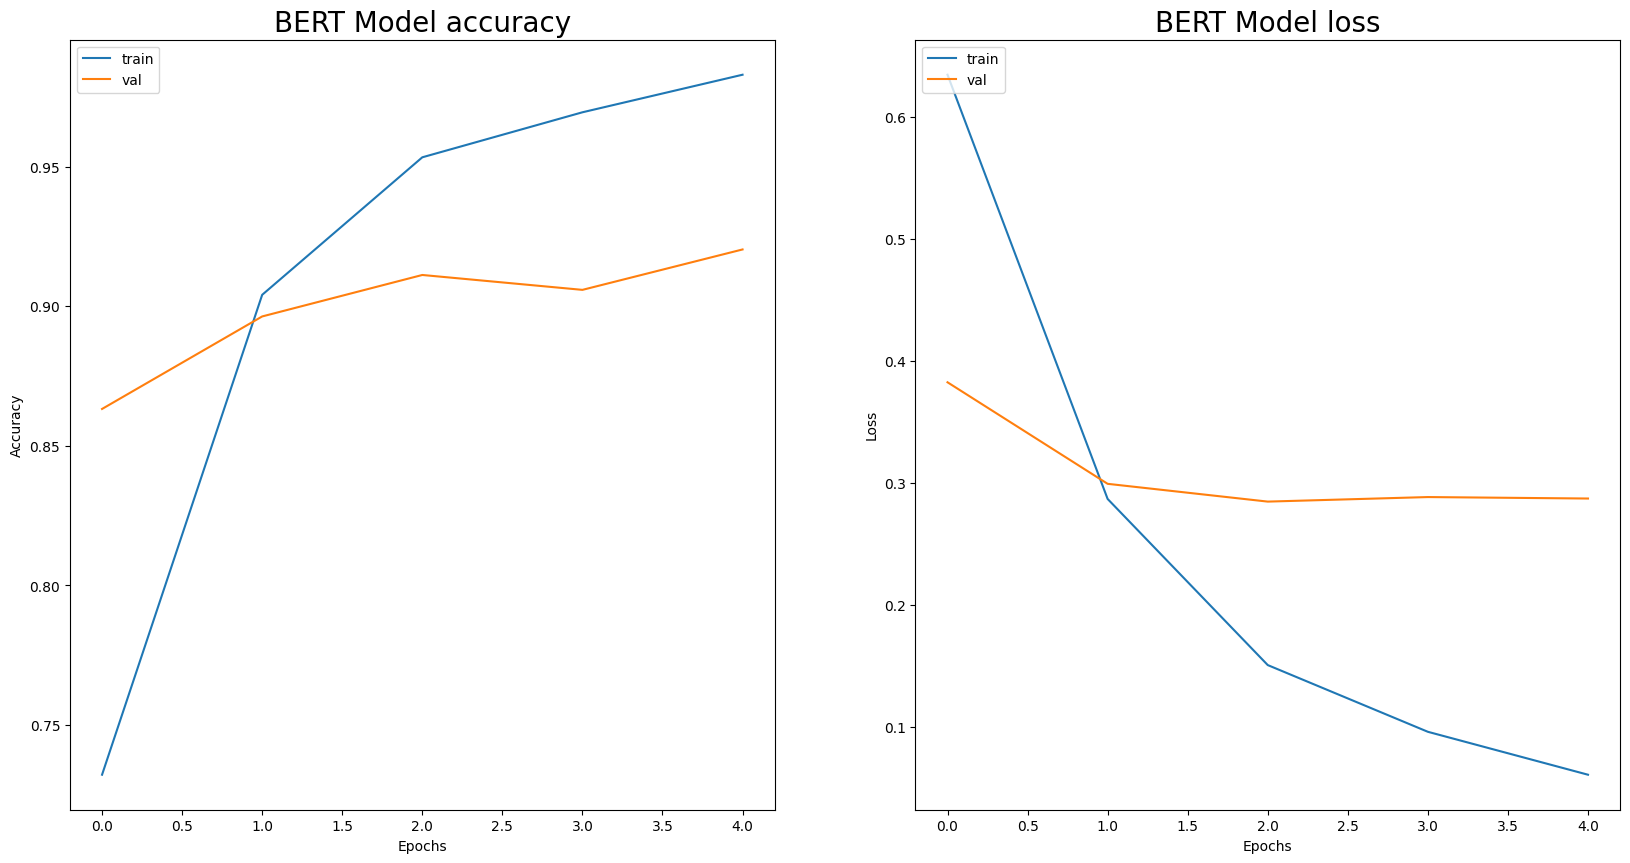


Model evaluation on test data:
141/141 [==============================] - 10s 51ms/step - loss: 0.2765 - accuracy: 0.9264

Test loss: 0.2765394449234009, Test accuracy: 0.9264444708824158
141/141 [==============================] - 9s 51ms/step

BiLSTM Model

1. Tokenize and encoding using BERT Tokenizer...

2. Generating word embeddings using BERT Model...
Shape of train Word Embeddings: torch.Size([7875, 55, 768])
Shape of validation Word Embeddings: torch.Size([2625, 79, 768])
Shape of test Word Embeddings: torch.Size([4500, 50, 768])

3. Viewing encoded and decoded entry of train data...
Train Decoded Text: nd check box check
Train tokenized Text: ['n', '##d', 'check', 'box', 'check']
Encoded Text: tensor([[ 101, 1050, 2094, 4638, 3482, 4638,  102]])

4. Label encoding using OneHotEncoder...

5. Building Bi-LSTM Model...
Epoch 1/5
493/493 [==============================] - 11s 14ms/step - loss: 3.1705 - accuracy: 0.6467 - val_loss: 0.9136 - val_accuracy: 0.6907
Epoch 2/5
493/493 [=

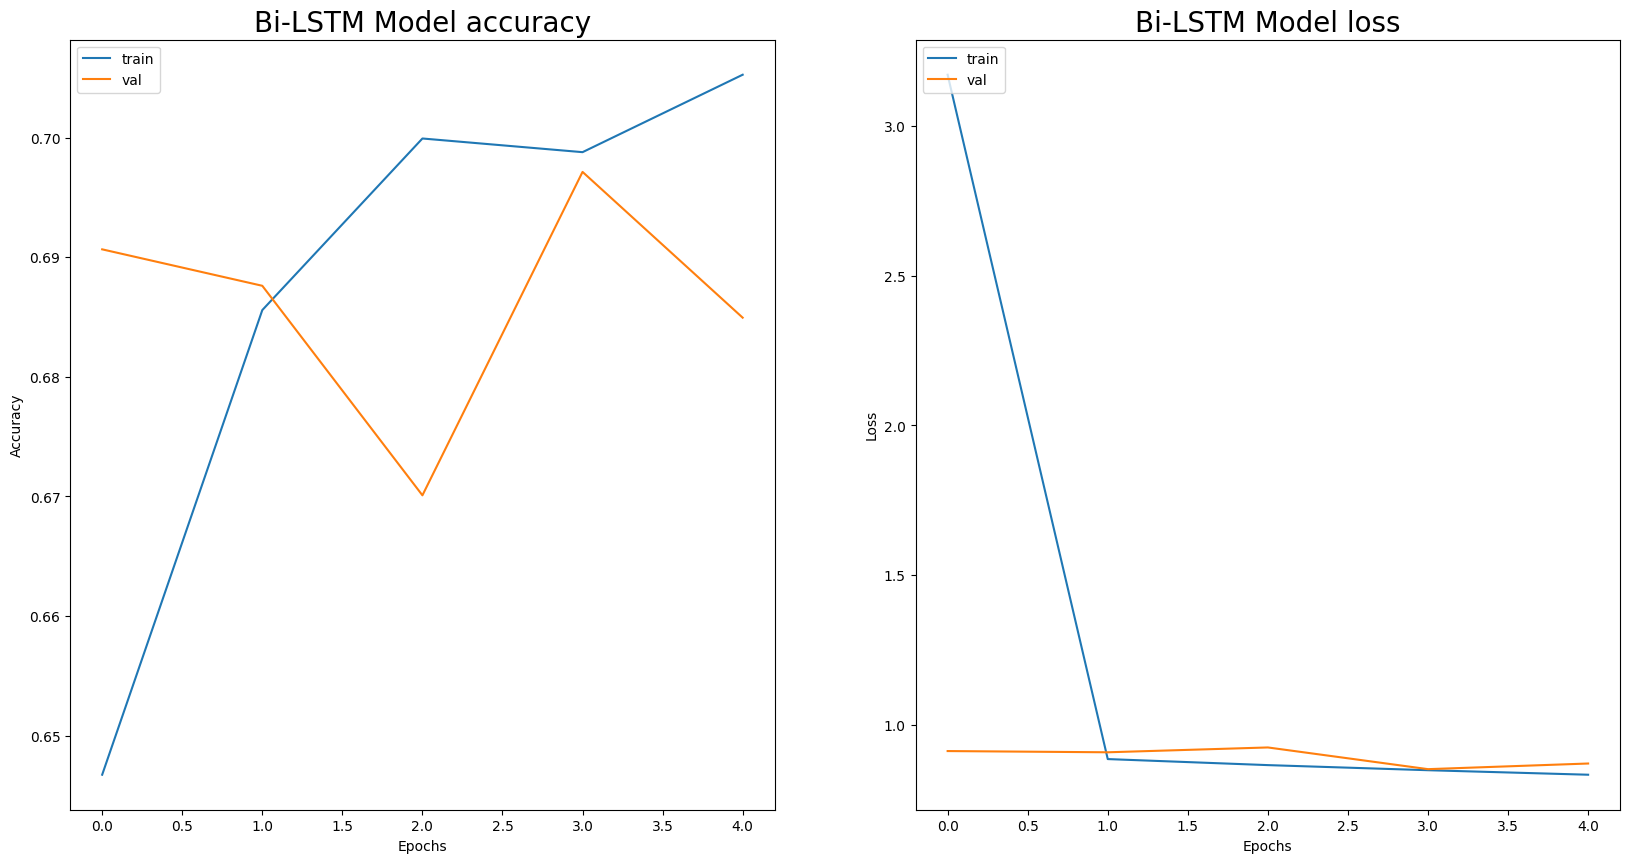


7. Testing the Model...
4500/4500 [==============================] - 18s 4ms/step - loss: 0.8600 - accuracy: 0.6822

Test loss: 0.8600438833236694, Test accuracy: 0.6822222471237183

8. Prediction of the Model...
141/141 [==============================] - 1s 4ms/step

BERT and Bi-LSTM Models report

Actual Label    : ['Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral']
BERT Predicted Label : ['Neutral', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral']
Bi-LSTM Predicted Label : ['Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral']


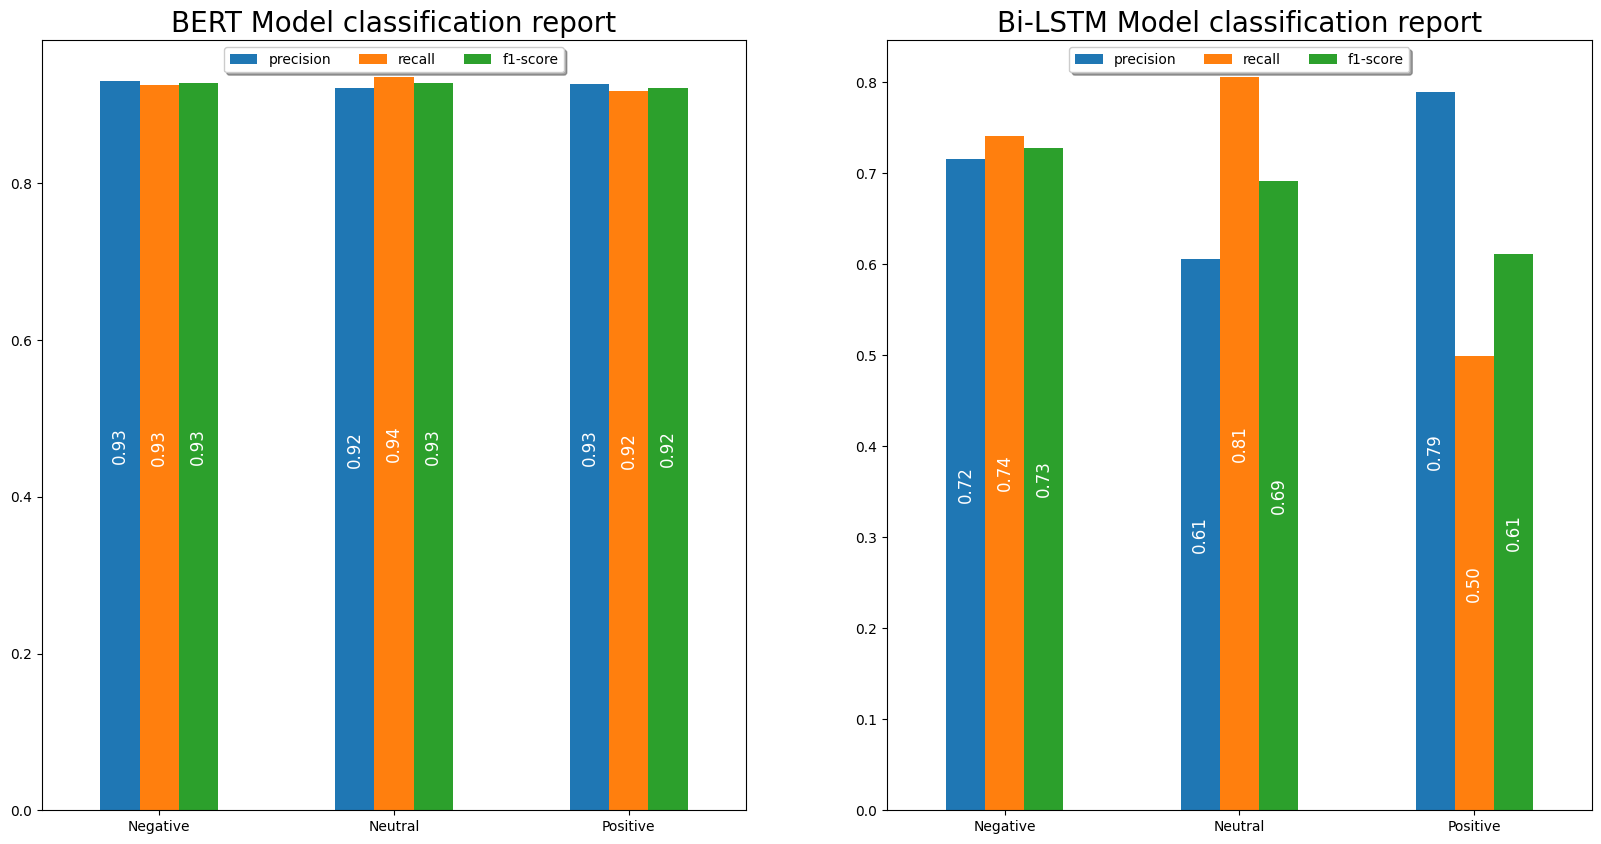

In [68]:
bert_test_accuracy_strat, bilstm_test_accuracy_strat, bert_test_loss_strat, bilstm_test_loss_strat = run_models(1)

#### 6.2 Training the model for second set of samples

In [ ]:
bert_test_accuracy_strat, bilstm_test_accuracy_strat, bert_test_loss_strat, bilstm_test_loss_strat = run_models(2)

#### 6.3 Training the model for third set of samples

Sample 3 with 15000 samples:

Shape of dataset is:  (226373,)
Shape of boostrapped resampled dataset is:  (15000,)

Shape of train is: (7875,)
Shape of val is: (2625,)
Shape of test is: (4500,)
BERT Model

Tweets text in train: ==> satisfy liberal modi taken left arm right arm face tear joy face tear joy
    
Input Ids of the text: ==> [  101 13225  4314 16913  2072  2579  2187  2849  2157  2849  2227  7697
  6569  2227  7697  6569   102     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
    
Decode Ids of the text: ==> [CLS] satisfy liberal modi taken left arm right arm face tear joy face tear joy [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
    
Attendtion mask of the text: ==> [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
    
Sentiment: ==> Negative
    
Epoch

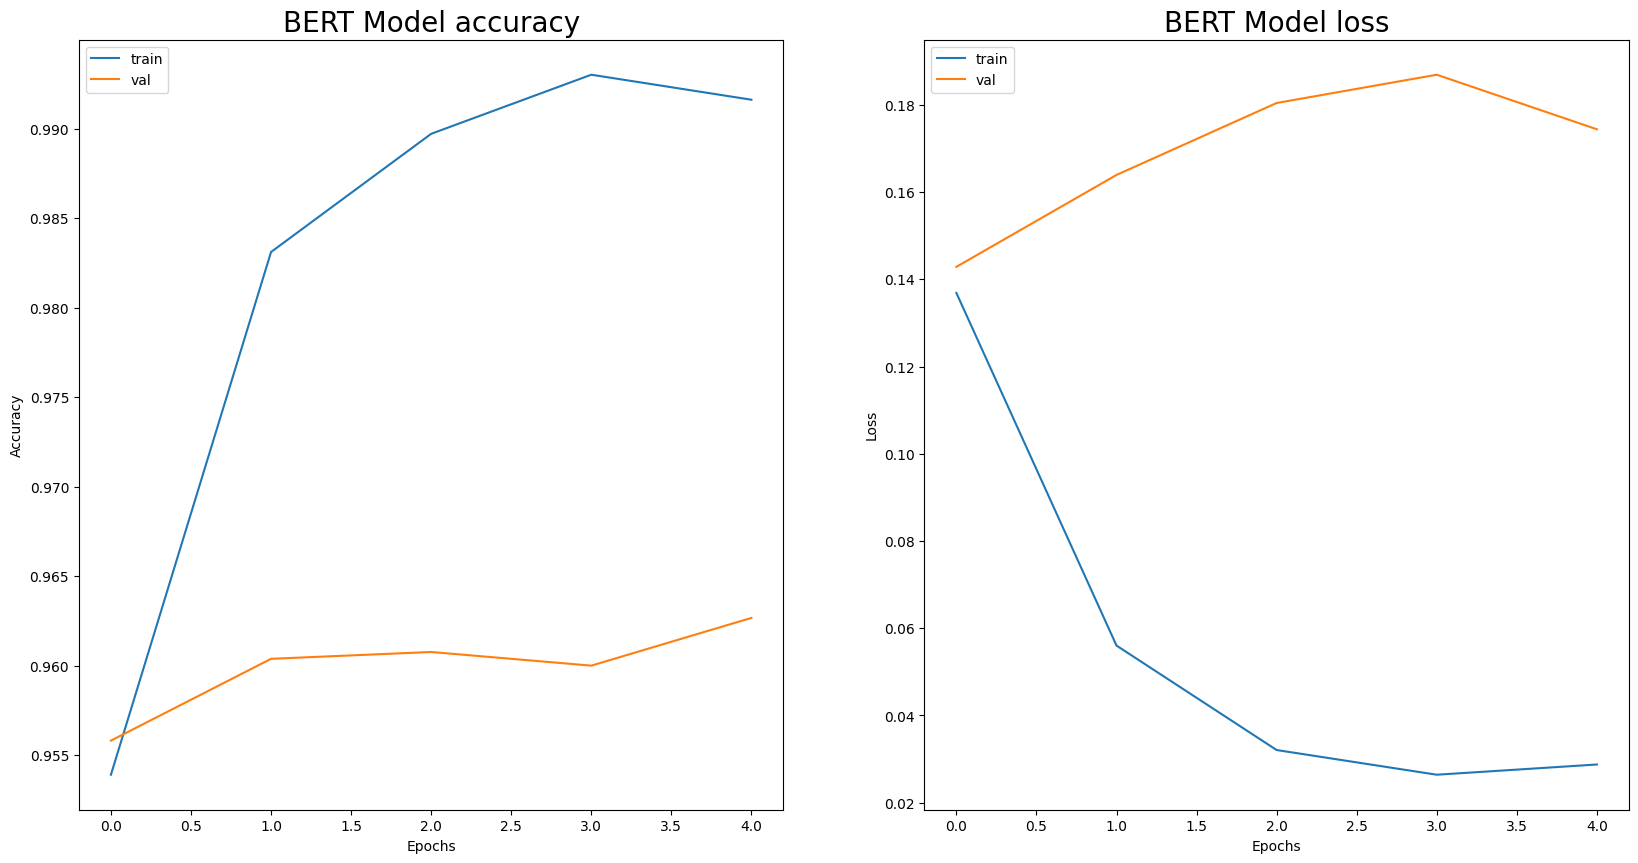


Model evaluation on test data:
141/141 [==============================] - 8s 53ms/step - loss: 0.1516 - accuracy: 0.9633

Test loss: 0.15163229405879974, Test accuracy: 0.9633333086967468
141/141 [==============================] - 7s 52ms/step

BiLSTM Model

1. Tokenize and encoding using BERT Tokenizer...

2. Generating word embeddings using BERT Model...
Shape of train Word Embeddings: torch.Size([7875, 40, 768])
Shape of validation Word Embeddings: torch.Size([2625, 87, 768])
Shape of test Word Embeddings: torch.Size([4500, 53, 768])

3. Viewing encoded and decoded entry of train data...
Train Decoded Text: breton
Train tokenized Text: ['breton']
Encoded Text: tensor([[  101, 16659,   102]])

4. Label encoding using OneHotEncoder...

5. Building Bi-LSTM Model...
Epoch 1/5
493/493 [==============================] - 11s 14ms/step - loss: 2.7913 - accuracy: 0.6521 - val_loss: 0.9399 - val_accuracy: 0.6613
Epoch 2/5
493/493 [==============================] - 5s 10ms/step - loss: 0.8919

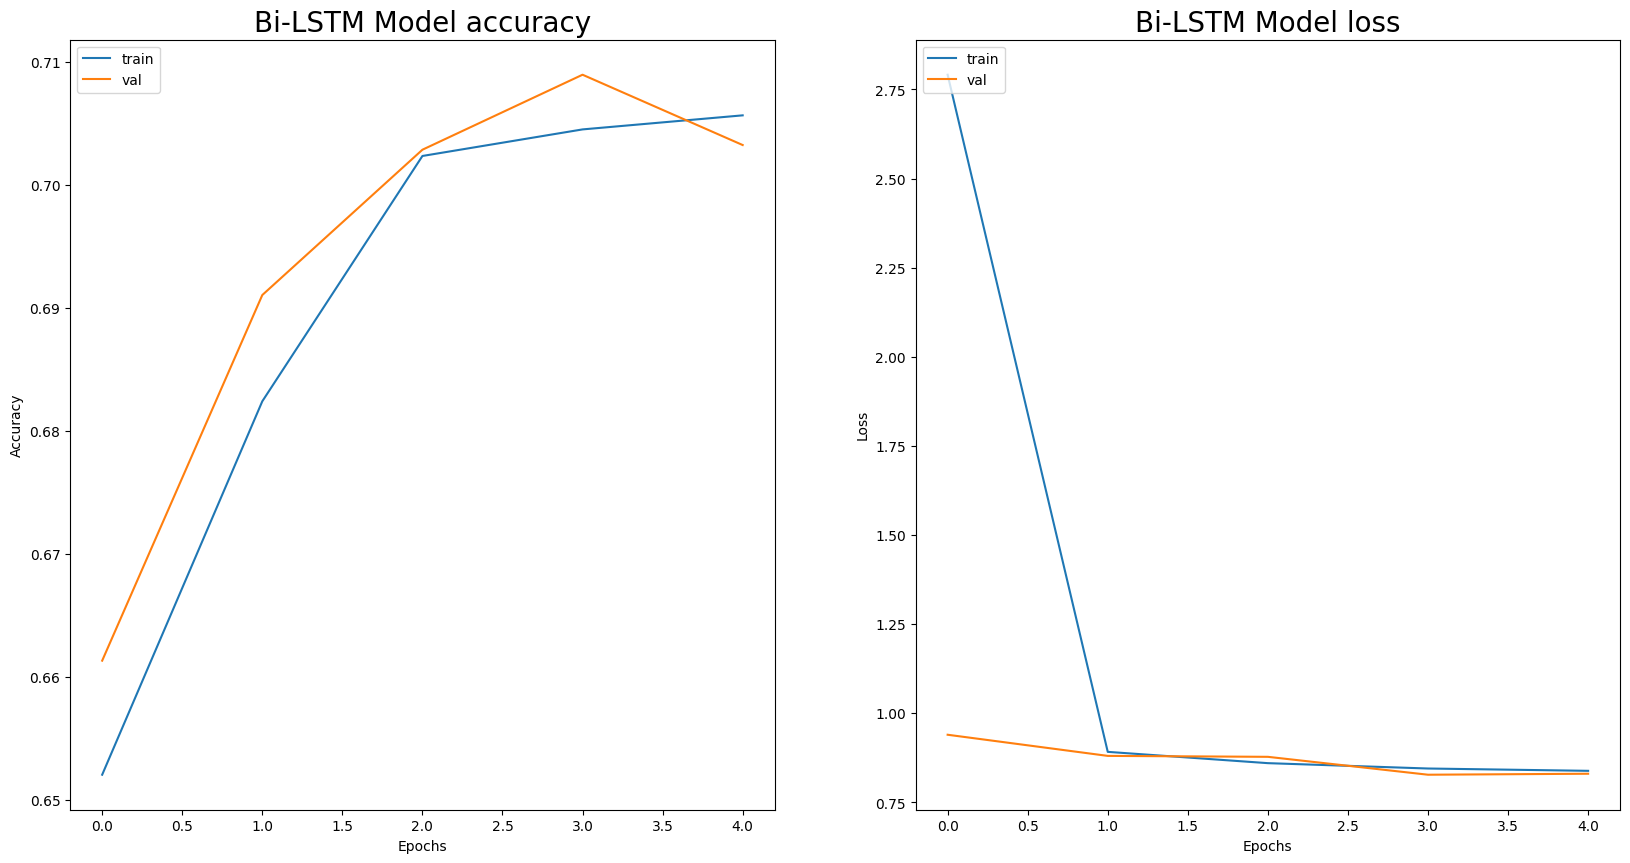


7. Testing the Model...
4500/4500 [==============================] - 17s 4ms/step - loss: 0.8266 - accuracy: 0.7069

Test loss: 0.826572835445404, Test accuracy: 0.7068889141082764

8. Prediction of the Model...
141/141 [==============================] - 1s 4ms/step

BERT and Bi-LSTM Models report

Actual Label    : ['Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral']
BERT Predicted Label : ['Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Neutral']
Bi-LSTM Predicted Label : ['Positive', 'Negative', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral']


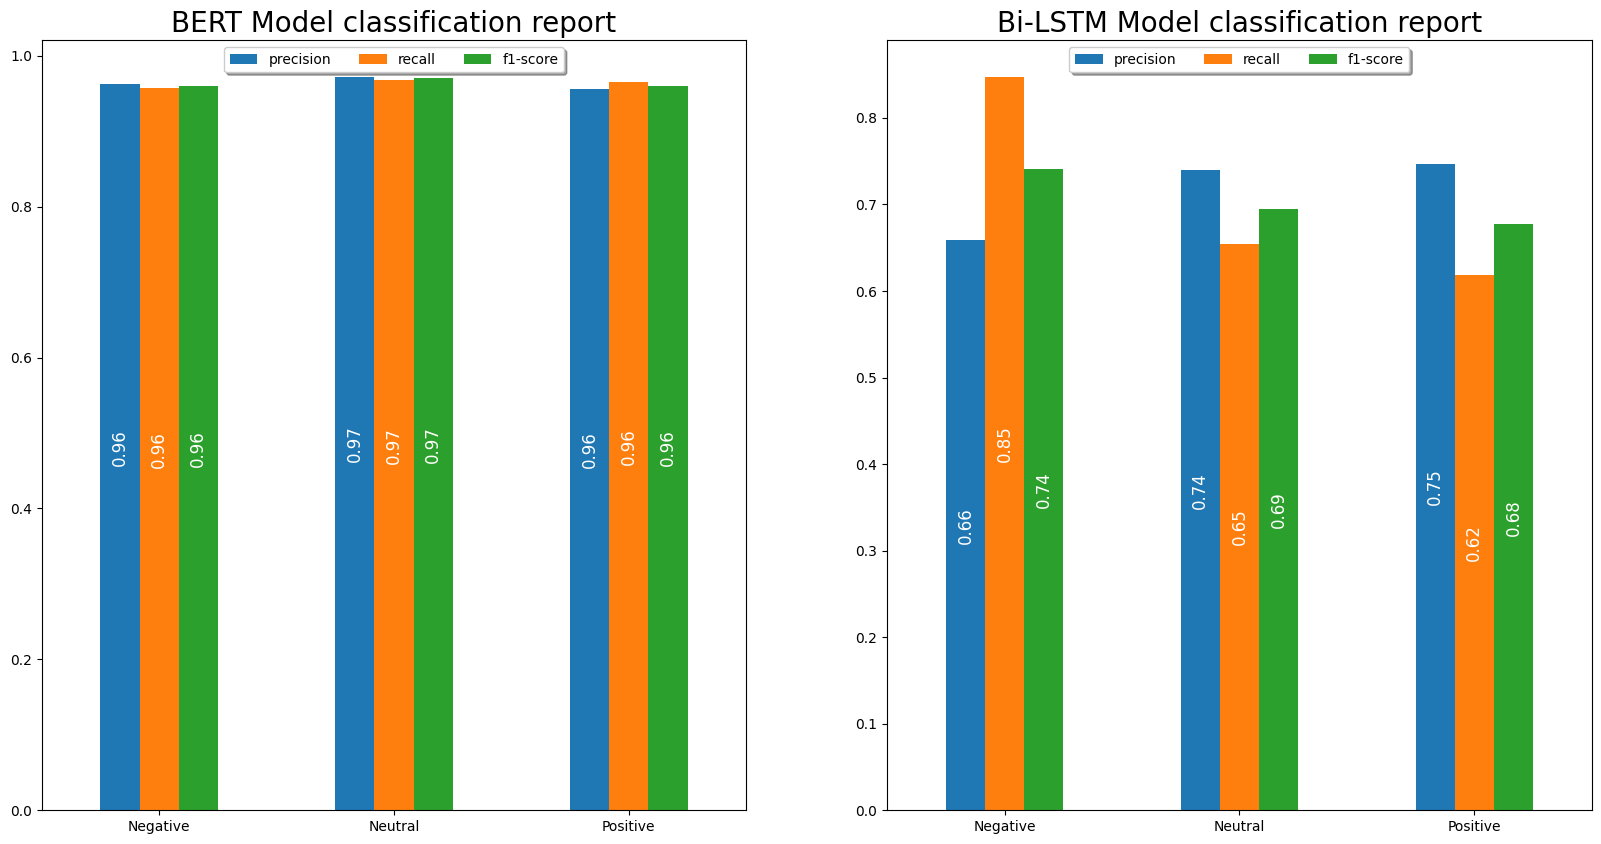

In [70]:
bert_test_accuracy_strat, bilstm_test_accuracy_strat, bert_test_loss_strat, bilstm_test_loss_strat = run_models(3)

#### 6.4 Training the model for fourth set of samples

Sample 4 with 15000 samples:

Shape of dataset is:  (226373,)
Shape of boostrapped resampled dataset is:  (15000,)

Shape of train is: (7875,)
Shape of val is: (2625,)
Shape of test is: (4500,)
BERT Model

Tweets text in train: ==> folded hand face medical mask one largest vaccination center europe opened gostiny dvor people
    
Input Ids of the text: ==> [  101  6999  2192  2227  2966  7308  2028  2922 12436 14693  9323  2415
  2885  2441  2175 16643  4890  1040 14550  2111   102     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
    
Decode Ids of the text: ==> [CLS] folded hand face medical mask one largest vaccination center europe opened gostiny dvor people [SEP] [PAD] [PAD] [

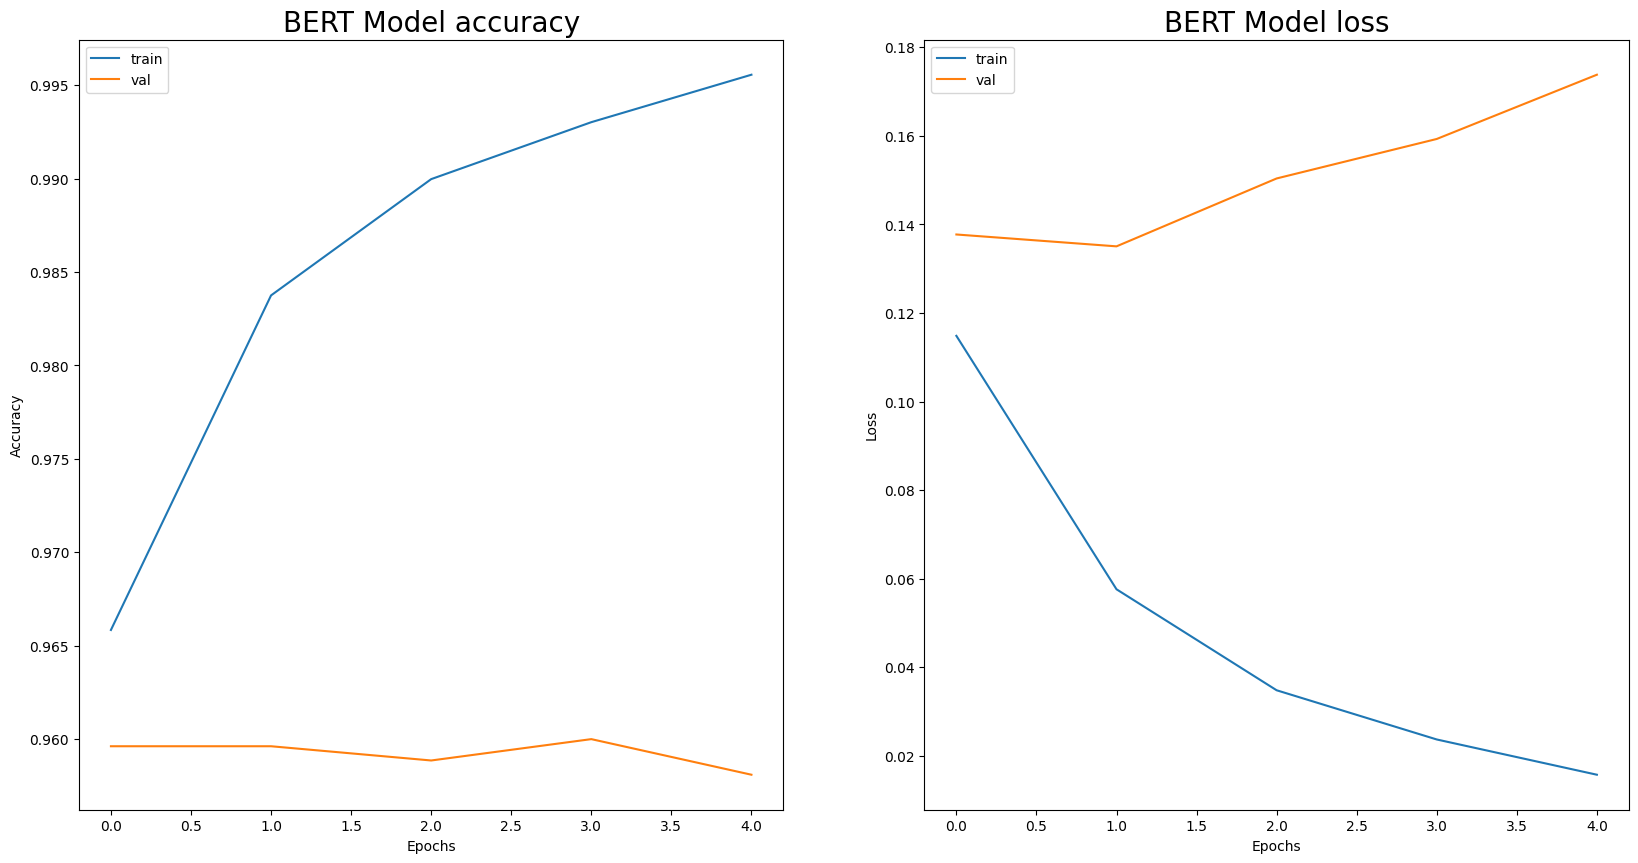


Model evaluation on test data:
141/141 [==============================] - 9s 66ms/step - loss: 0.1582 - accuracy: 0.9624

Test loss: 0.15821118652820587, Test accuracy: 0.9624444246292114
141/141 [==============================] - 9s 66ms/step

BiLSTM Model

1. Tokenize and encoding using BERT Tokenizer...

2. Generating word embeddings using BERT Model...
Shape of train Word Embeddings: torch.Size([7875, 80, 768])
Shape of validation Word Embeddings: torch.Size([2625, 70, 768])
Shape of test Word Embeddings: torch.Size([4500, 70, 768])

3. Viewing encoded and decoded entry of train data...
Train Decoded Text: manipal whitefield r
Train tokenized Text: ['mani', '##pal', 'white', '##field', 'r']
Encoded Text: tensor([[  101, 23624, 12952,  2317,  3790,  1054,   102]])

4. Label encoding using OneHotEncoder...

5. Building Bi-LSTM Model...
Epoch 1/5
493/493 [==============================] - 10s 15ms/step - loss: 3.7113 - accuracy: 0.6352 - val_loss: 0.8718 - val_accuracy: 0.7185
Epoch 

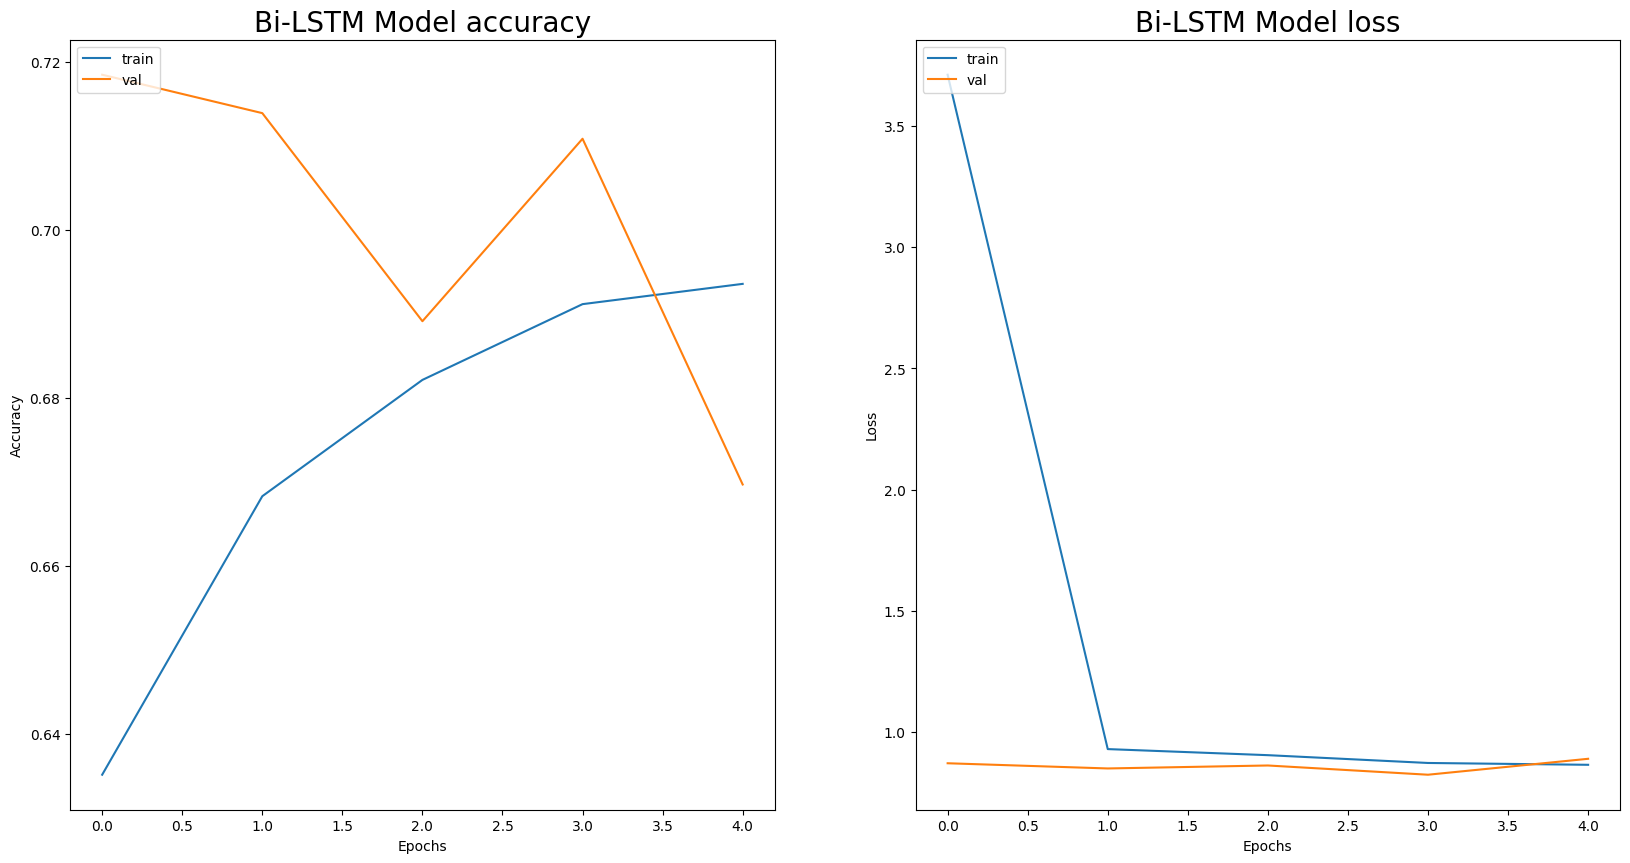


7. Testing the Model...
4500/4500 [==============================] - 17s 4ms/step - loss: 0.9008 - accuracy: 0.6649

Test loss: 0.9008324146270752, Test accuracy: 0.6648889183998108

8. Prediction of the Model...
141/141 [==============================] - 1s 5ms/step

BERT and Bi-LSTM Models report

Actual Label    : ['Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral']
BERT Predicted Label : ['Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral']
Bi-LSTM Predicted Label : ['Positive', 'Negative', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative']


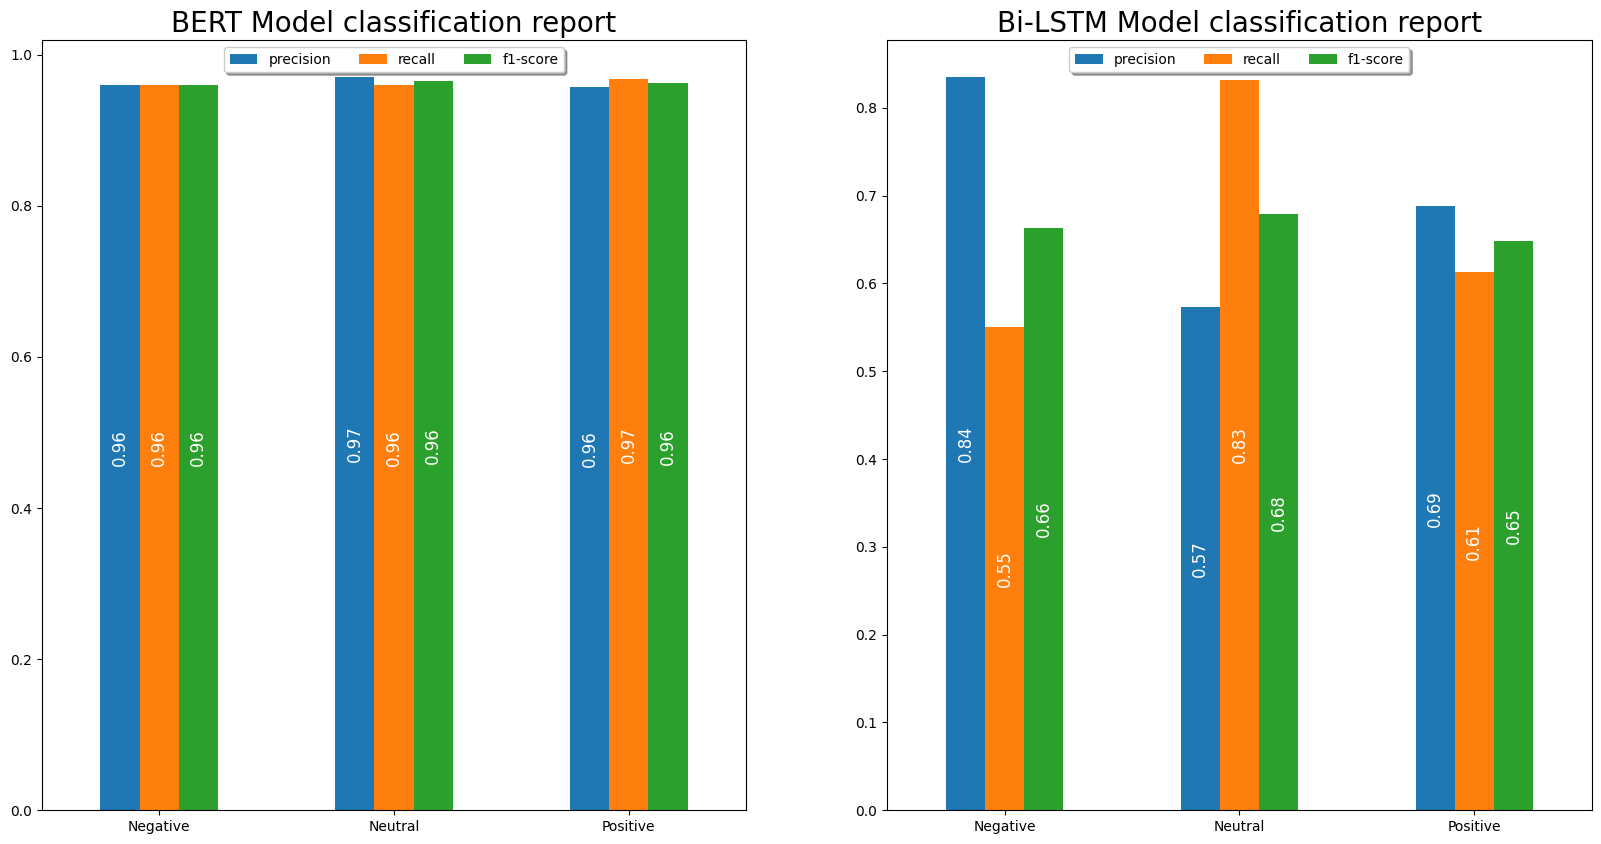

In [71]:
bert_test_accuracy_strat, bilstm_test_accuracy_strat, bert_test_loss_strat, bilstm_test_loss_strat = run_models(4)

#### 6.5 Training the model for fifth set of samples

Sample 5 with 15000 samples:

Shape of dataset is:  (226373,)
Shape of boostrapped resampled dataset is:  (15000,)

Shape of train is: (7875,)
Shape of val is: (2625,)
Shape of test is: (4500,)
BERT Model

Tweets text in train: ==> matter time party jump bandwagon say
    
Input Ids of the text: ==> [ 101 3043 2051 2283 5376 2316 4213 7446 2360  102    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
    
Decode Ids of the text: ==> [CLS] matter time party jump bandwagon say [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
    
Attendtion mask of the text: ==> [1 1 1 1 1 1 1 1 1 1 0 0 0 0 

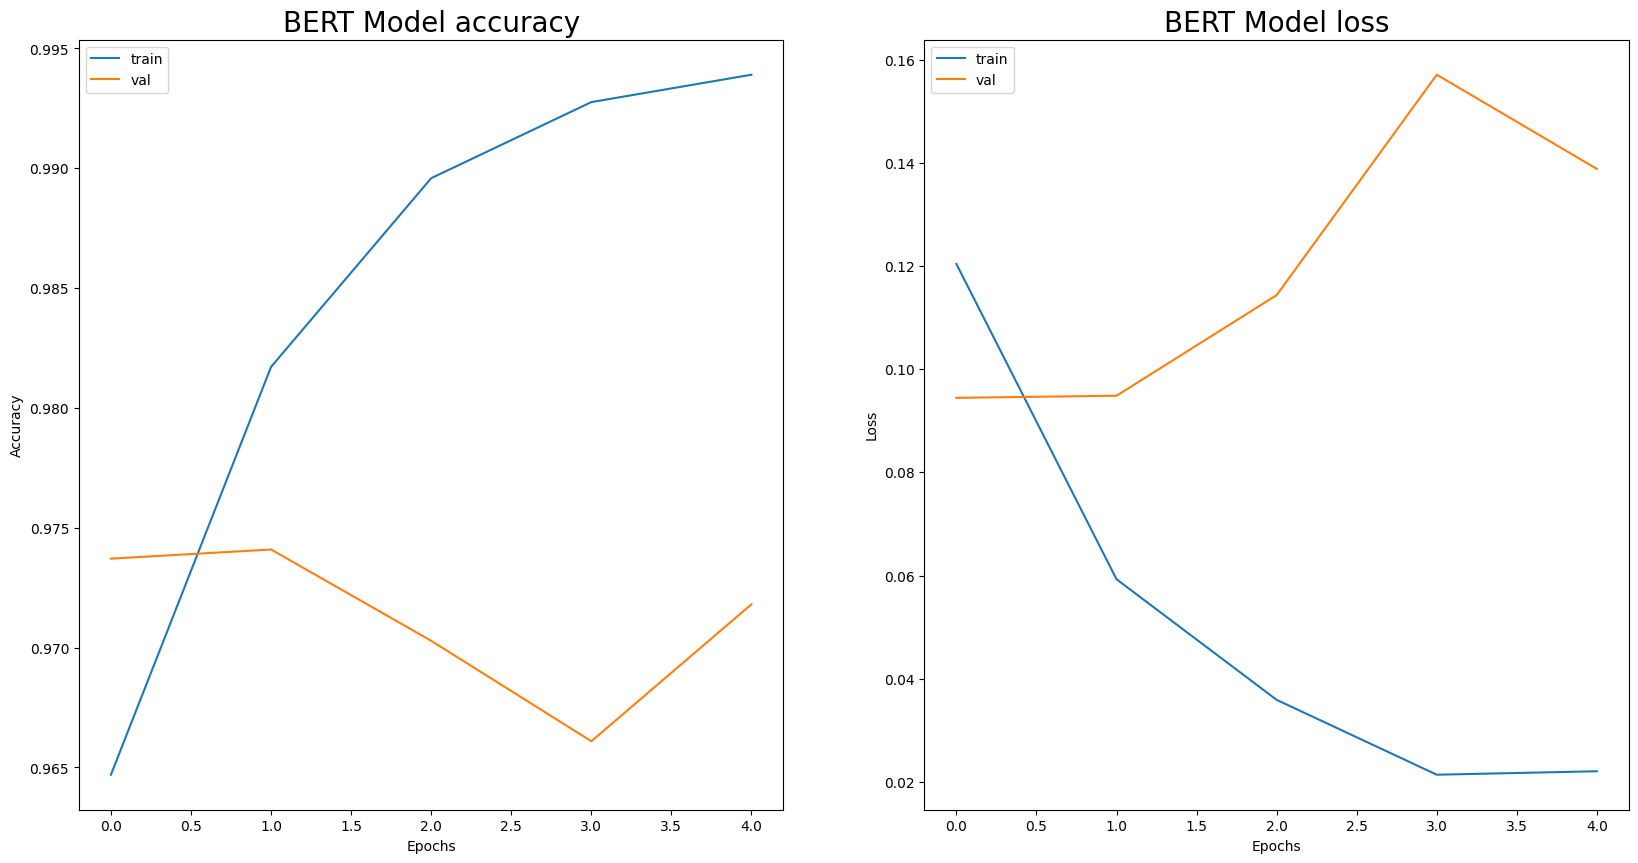


Model evaluation on test data:
141/141 [==============================] - 8s 56ms/step - loss: 0.1531 - accuracy: 0.9656

Test loss: 0.15309837460517883, Test accuracy: 0.9655555486679077
141/141 [==============================] - 8s 55ms/step

BiLSTM Model

1. Tokenize and encoding using BERT Tokenizer...

2. Generating word embeddings using BERT Model...
Shape of train Word Embeddings: torch.Size([7875, 55, 768])
Shape of validation Word Embeddings: torch.Size([2625, 48, 768])
Shape of test Word Embeddings: torch.Size([4500, 59, 768])

3. Viewing encoded and decoded entry of train data...
Train Decoded Text: palestinian received march dos chinese coronavirus
Train tokenized Text: ['palestinian', 'received', 'march', 'dos', 'chinese', 'corona', '##virus']
Encoded Text: tensor([[  101,  9302,  2363,  2233,  9998,  2822, 21887, 23350,   102]])

4. Label encoding using OneHotEncoder...

5. Building Bi-LSTM Model...
Epoch 1/5
493/493 [==============================] - 9s 13ms/step - loss

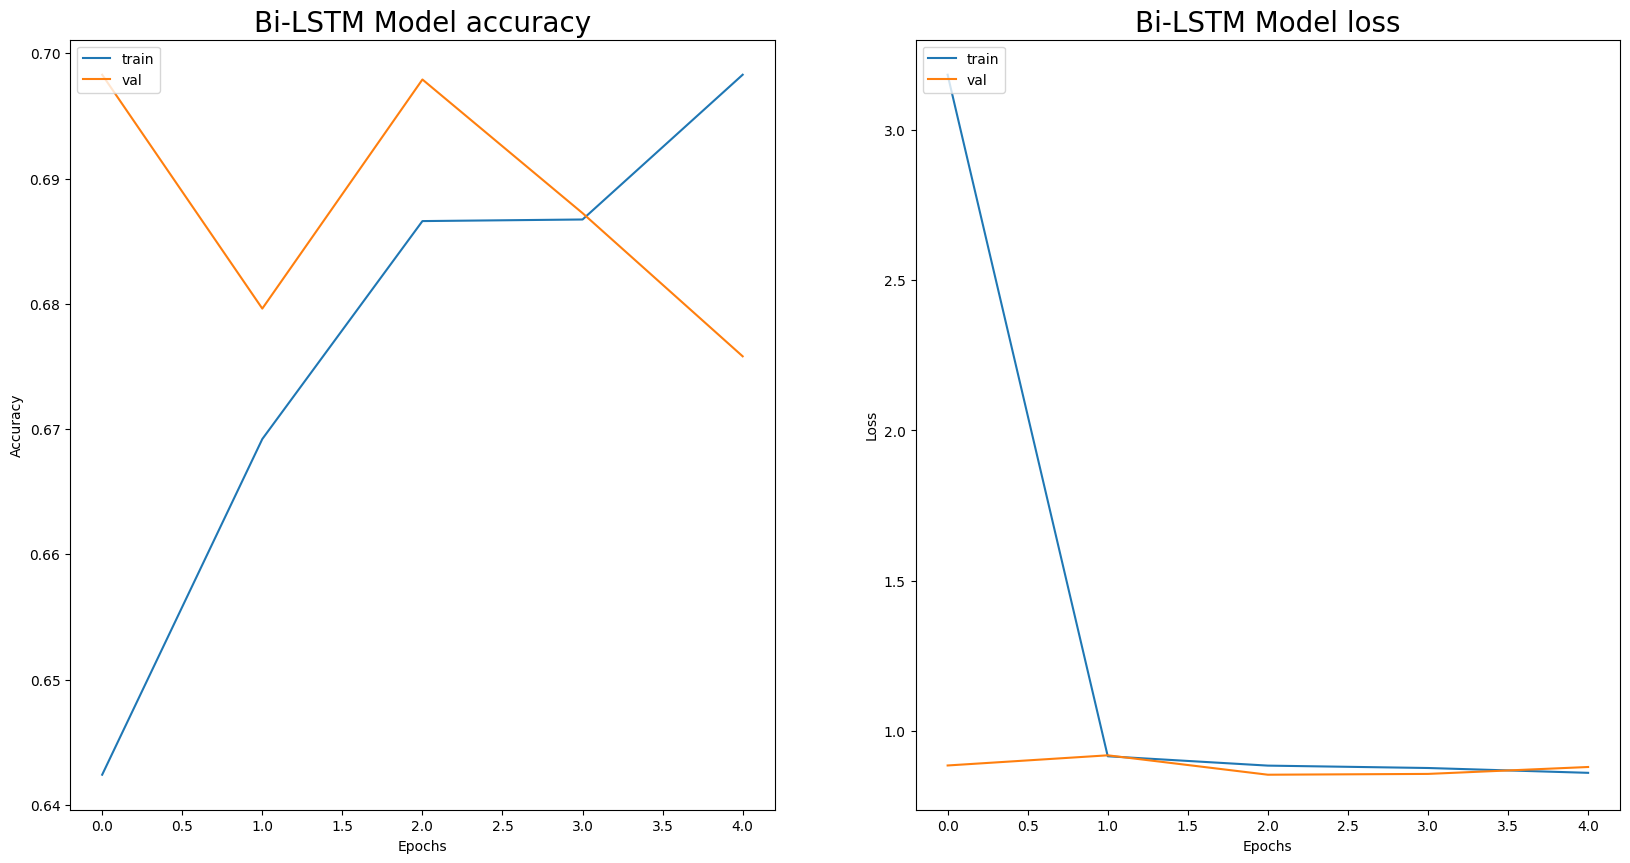


7. Testing the Model...
4500/4500 [==============================] - 17s 4ms/step - loss: 0.8802 - accuracy: 0.6740

Test loss: 0.8802443146705627, Test accuracy: 0.6740000247955322

8. Prediction of the Model...
141/141 [==============================] - 1s 5ms/step

BERT and Bi-LSTM Models report

Actual Label    : ['Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral']
BERT Predicted Label : ['Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral']
Bi-LSTM Predicted Label : ['Positive', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral']


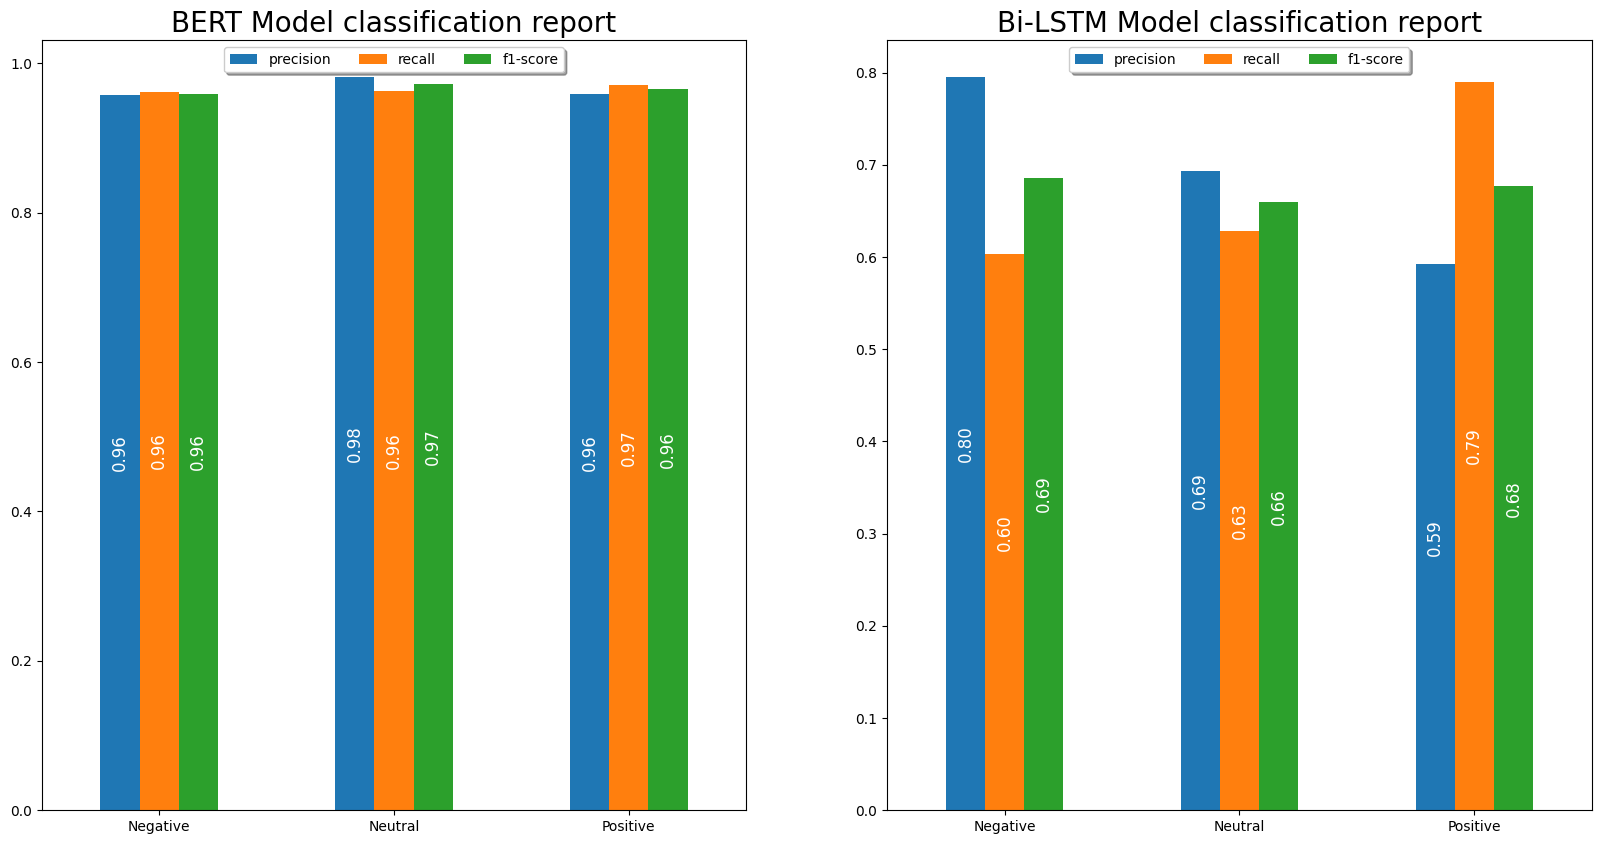

In [72]:
bert_test_accuracy_strat, bilstm_test_accuracy_strat, bert_test_loss_strat, bilstm_test_loss_strat = run_models(5)

### Plotting the test accuracies of the samples

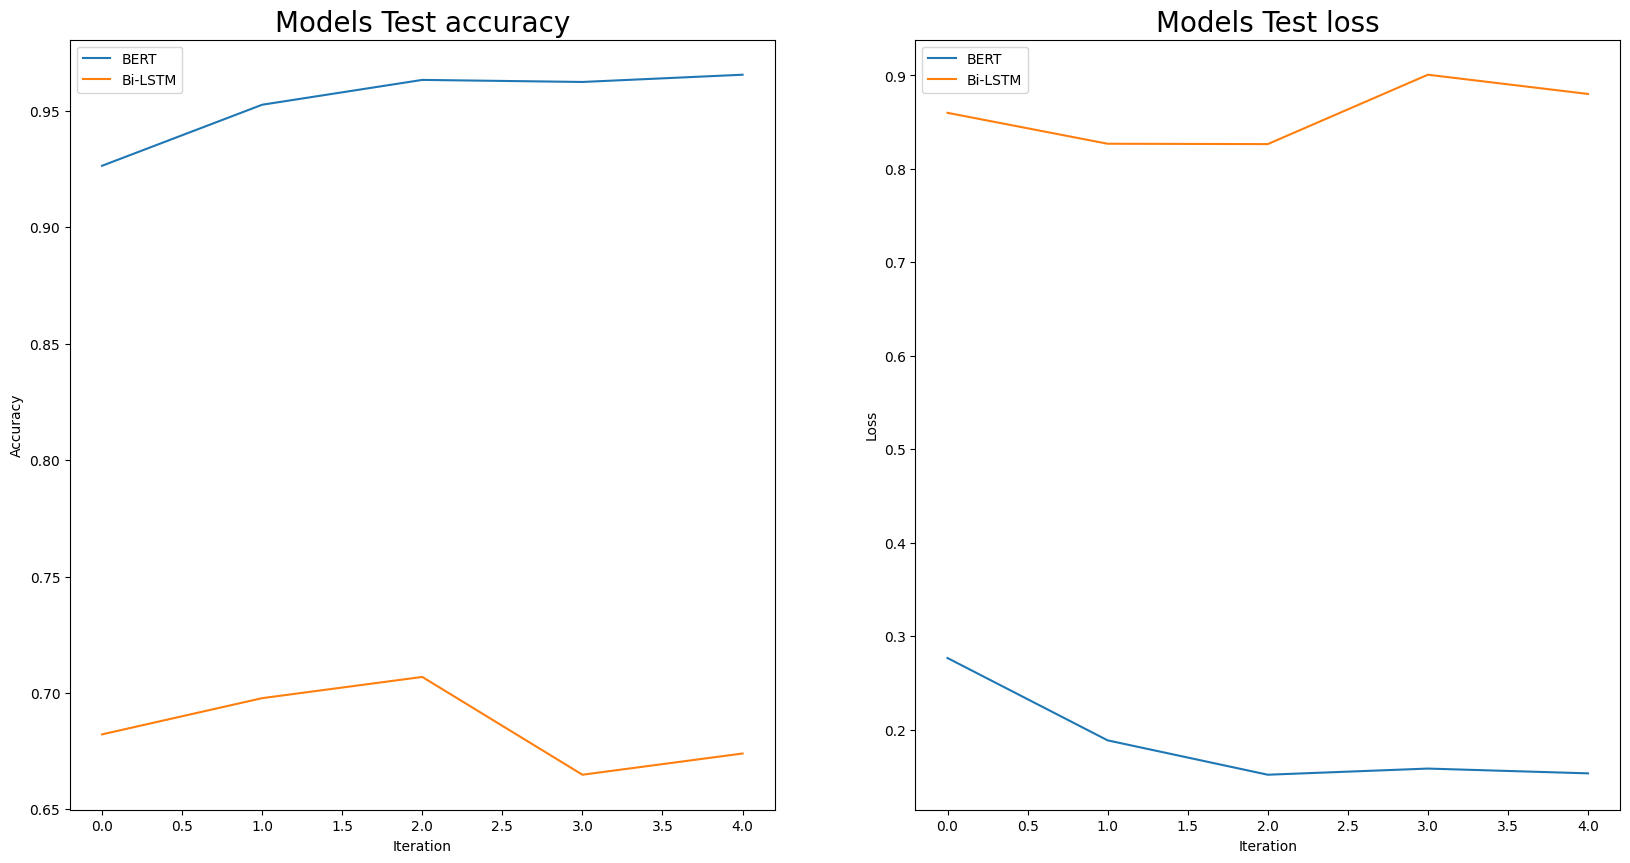

In [73]:
#plotting the models test accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
fig.set_figheight(10)
fig.set_figwidth(20)

#Train Accuracy
ax1.plot(bert_test_accuracy_strat)
ax1.plot(bilstm_test_accuracy_strat)
ax1.set_title('Models Test accuracy', fontdict={'fontsize': 20})
ax1.legend(['BERT','Bi-LSTM'], loc='upper left')
ax1.set(xlabel="Iteration", ylabel="Accuracy")

#Train Loss
ax2.plot(bert_test_loss_strat)
ax2.plot(bilstm_test_loss_strat)
ax2.set_title('Models Test loss', fontdict={'fontsize': 20})
ax2.legend(['BERT','Bi-LSTM'], loc='upper left')
ax2.set(xlabel="Iteration", ylabel="Loss")
plt.show()

In [74]:
cols = []
for idx in range(1,len(bilstm_test_accuracy_strat)+1):
    cols.append("Sample_" + str(idx))

In [75]:
model_metrics = pd.DataFrame({"Samples sets": cols, "BERT Test accuracy": bert_test_accuracy_strat, 
              "BiLSTM Test accuracy": bilstm_test_accuracy_strat})

model_metrics

Samples sets  BERT Test accuracy  BiLSTM Test accuracy
0     Sample_1            0.926444              0.682222
1     Sample_2            0.952667              0.697778
2     Sample_3            0.963333              0.706889
3     Sample_4            0.962444              0.664889
4     Sample_5            0.965556              0.674000

In [76]:
#Final accuracy with mean

model_metrics_final = pd.DataFrame({"BERT - Mean accuracy (%)": round(statistics.mean(bert_test_accuracy_strat),4)*100, 
              "BiLSTM Mean accuracy (%)": round(statistics.mean(bilstm_test_accuracy_strat),4)*100}, index=['Final'])

model_metrics_final

BERT - Mean accuracy (%)  BiLSTM Mean accuracy (%)
Final                     95.41                     68.52